# Store Sales & Profit Analysis 📊💰

This NoteBook provides an analysis of sales and profit data for stores.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 
import plotly.io as pio 
import plotly.colors as colors
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
# plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

# Set the maximum number of columns to display
pd.options.display.max_columns = None
# Set the maximum number of rows to display
pd.options.display.max_rows = 10

plt.rc("figure", figsize=(22, 8))


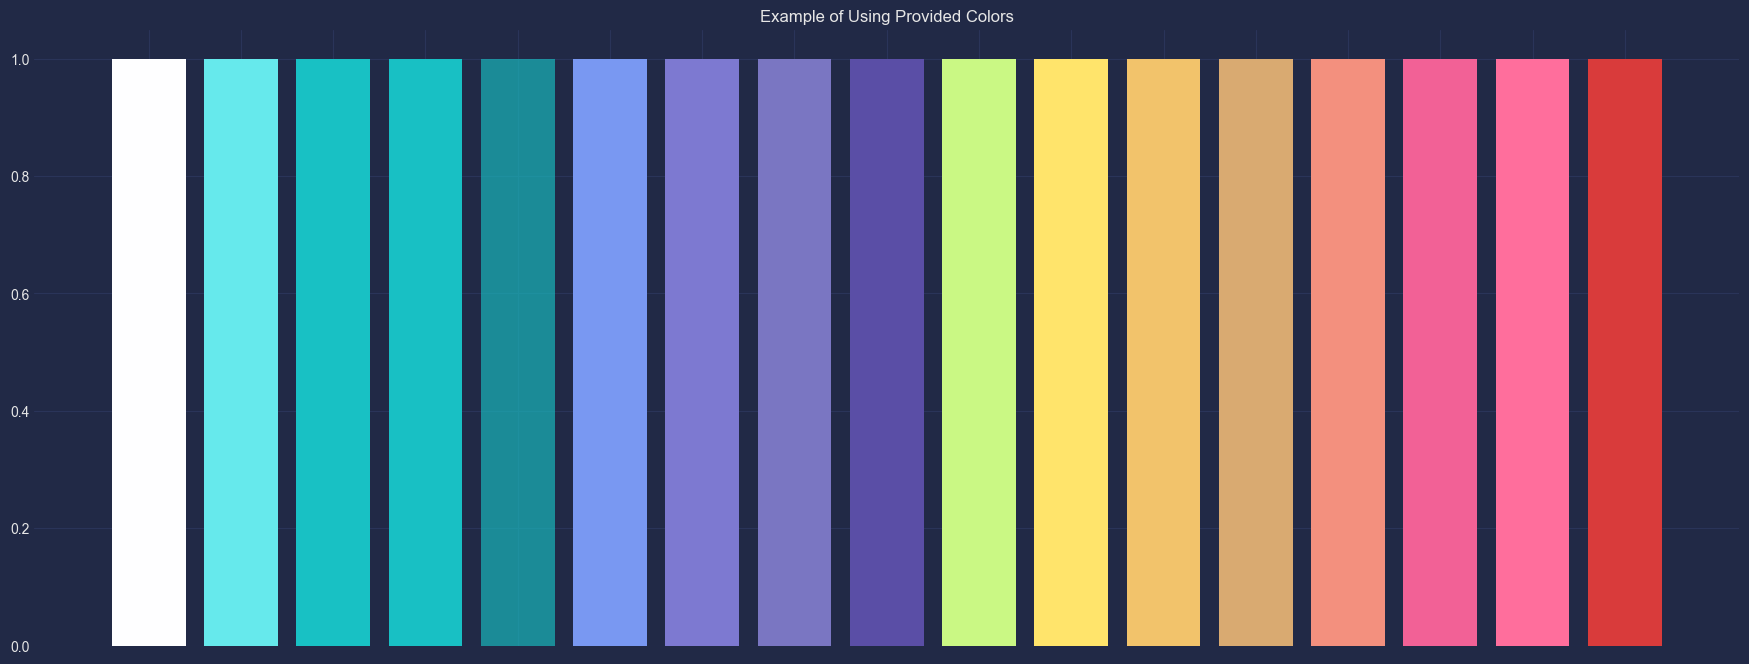

In [2]:
import matplotlib.pyplot as plt

# List of color codes
colors = [
    "#fefeff", "#66E9EC", "#18c1c4", "#18c0c4", "#18c1c4a6",
    "#7998F2", "#7d79d1", "#7A76C2", "#5A4EA6", "#CAF884",
    "#ffe46b", "#F2C36B", "#D9AA71", "#f3907e", "#f26196",
    "#FF6E9C", "#D93B3B"
]

for i, color in enumerate(colors):
    plt.bar(i, 1, color=color)

plt.title('Example of Using Provided Colors')
plt.xticks(range(len(colors)), ['' for _ in range(len(colors))])
plt.savefig('colors.png')
plt.show()


## Read data and discover it

This section involves reading the data and exploring its characteristics to gain insights.


In [3]:
df = pd.read_csv('./Data/Superstore.csv',encoding='windows-1252')
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,5/4/2017,5/9/2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [5]:
df.shape

(9994, 21)

### Checking data type and missing values 🕵️‍♂️🔍

In this section, we'll examine the data types of variables and identify any missing values. 📊


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
df.isna().sum()

Row ID          0
Order ID        0
Order Date      0
Ship Date       0
Ship Mode       0
               ..
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
Length: 21, dtype: int64

In [8]:
print(f"the sum of missing values in our df is {df.isnull().sum().sum()}")

the sum of missing values in our df is 0


In [9]:
print(f"The sum of duplicate values in our DataFrame is {df.duplicated().sum()}")


The sum of duplicate values in our DataFrame is 0


### Statistical Information 📊📈

This section provides statistical information about the dataset, including measures of central tendency and dispersion. 📊📈


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9994.0,4997.500000,2885.163629,1.000,2499.25000,4997.5000,7495.750,9994.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [11]:
df.describe(include="object")

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,1334,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,35,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [12]:
# Selecting categorical columns
df_cat = df[['Ship Mode', 'Customer ID', 'Customer Name',
             'Segment', 'Country', 'City', 'State', 'Region',
             'Product ID', 'Category', 'Sub-Category', 'Product Name']]

# Displaying the number of unique values in categorical data
for feature in df_cat.columns:
    unique_values = df_cat[feature].nunique()
    print(f"{feature}: {unique_values}")


Ship Mode: 4
Customer ID: 793
Customer Name: 793
Segment: 3
Country: 1
City: 531
State: 49
Region: 4
Product ID: 1862
Category: 3
Sub-Category: 17
Product Name: 1850


In [13]:
unique_dates = df['Order Date'].nunique()

print("Number of unique dates in the 'Order Date' column:", unique_dates)


Number of unique dates in the 'Order Date' column: 1237


In [14]:
unique_ship_dates = df['Ship Date'].nunique()

print("Number of unique ship dates in the 'Ship Date' column:", unique_ship_dates)


Number of unique ship dates in the 'Ship Date' column: 1334


## Data Preprocessing 🛠️


In [15]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df['Order Month'] = df['Order Date'].dt.month
df['Order Year'] = df['Order Date'].dt.year
df['Order DoW'] = df['Order Date'].dt.dayofweek

In [16]:
df['Order DoW']

0       1
1       1
2       6
3       6
4       6
       ..
9989    1
9990    6
9991    6
9992    6
9993    3
Name: Order DoW, Length: 9994, dtype: int64

In [17]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [18]:
# Convert 'Ship Mode' column to categorical type
df['Ship Mode'] = df['Ship Mode'].astype('category')

# Sort the categories
df['Ship Mode'] = df['Ship Mode'].cat.set_categories(
    ['Same Day', 'First Class', 'Second Class', 'Standard Class'],
    ordered=True
)

## Exploratory Data Analysis 📊🔍

This section focuses on analyzing and visualizing the data to uncover patterns, relationships, and insights. 📊🔍


### Sales Analysis 📈💼

In this analysis, we aim to answer the following questions:

#### 1. What is the overall trend of sales over time?


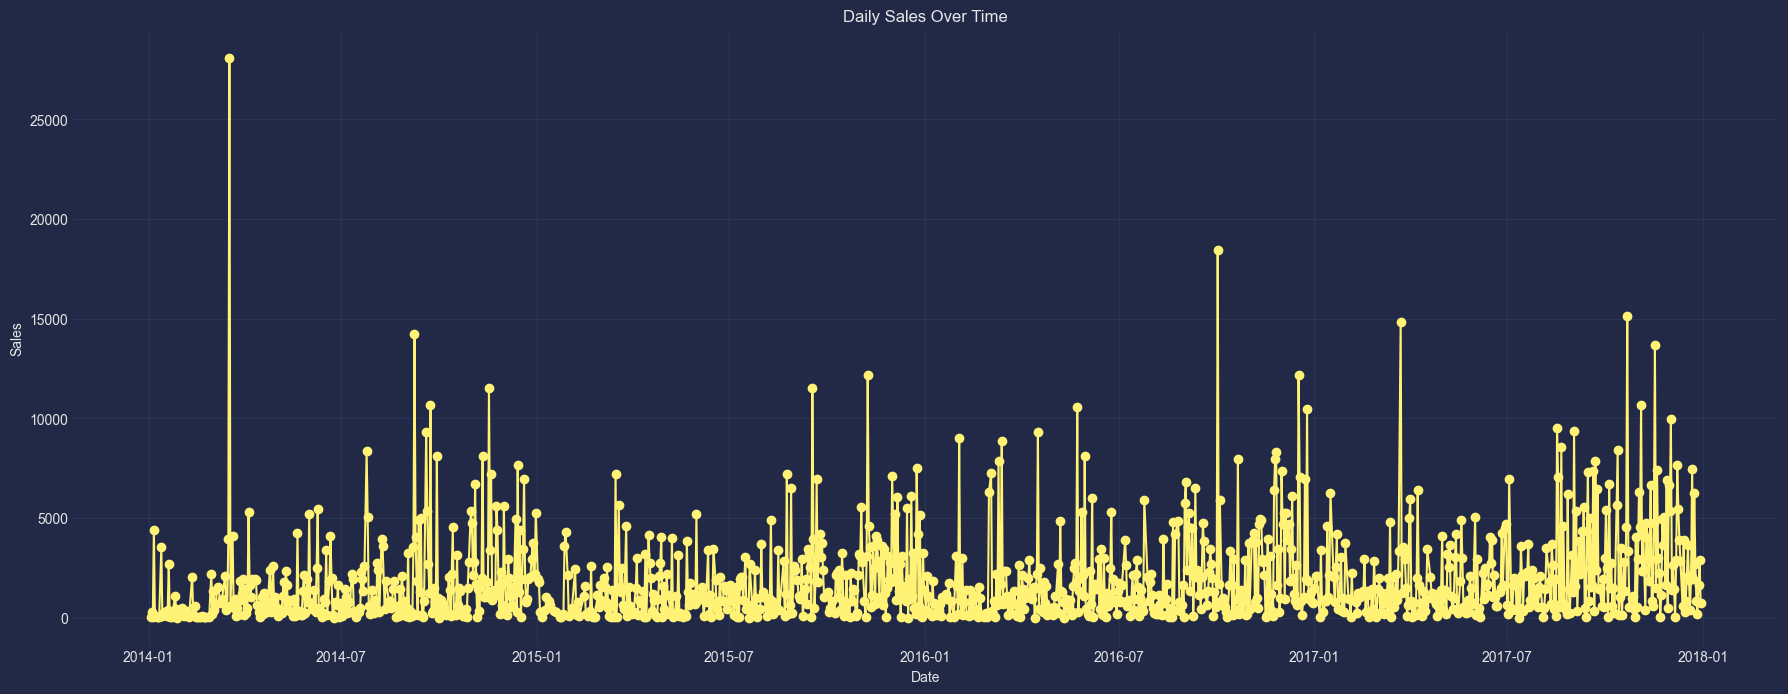

In [19]:
daily_sales = df.groupby('Order Date')['Sales'].sum()
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-',color='#fff275')
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

#### 2. What is the sales trend over time (monthly, yearly)?


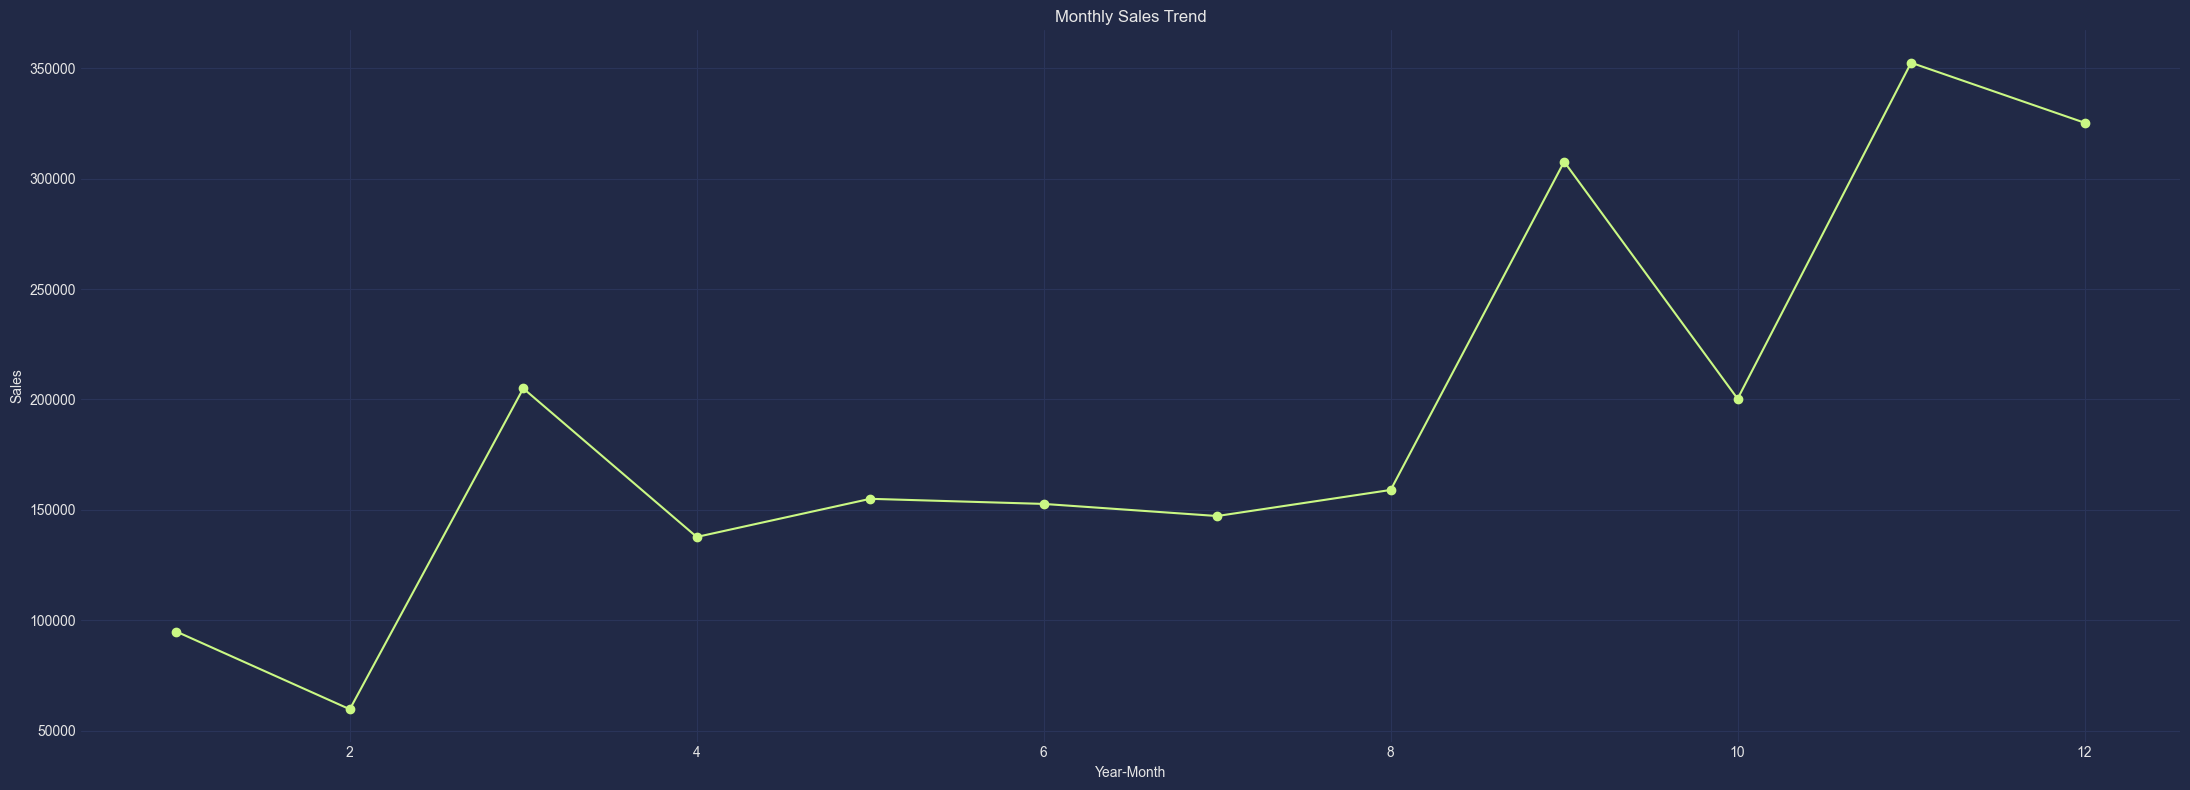

In [20]:
monthly_sales = df.groupby('Order Month')['Sales'].sum()
monthly_sales.plot(marker='o', linestyle='-',color='#CAF884')
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

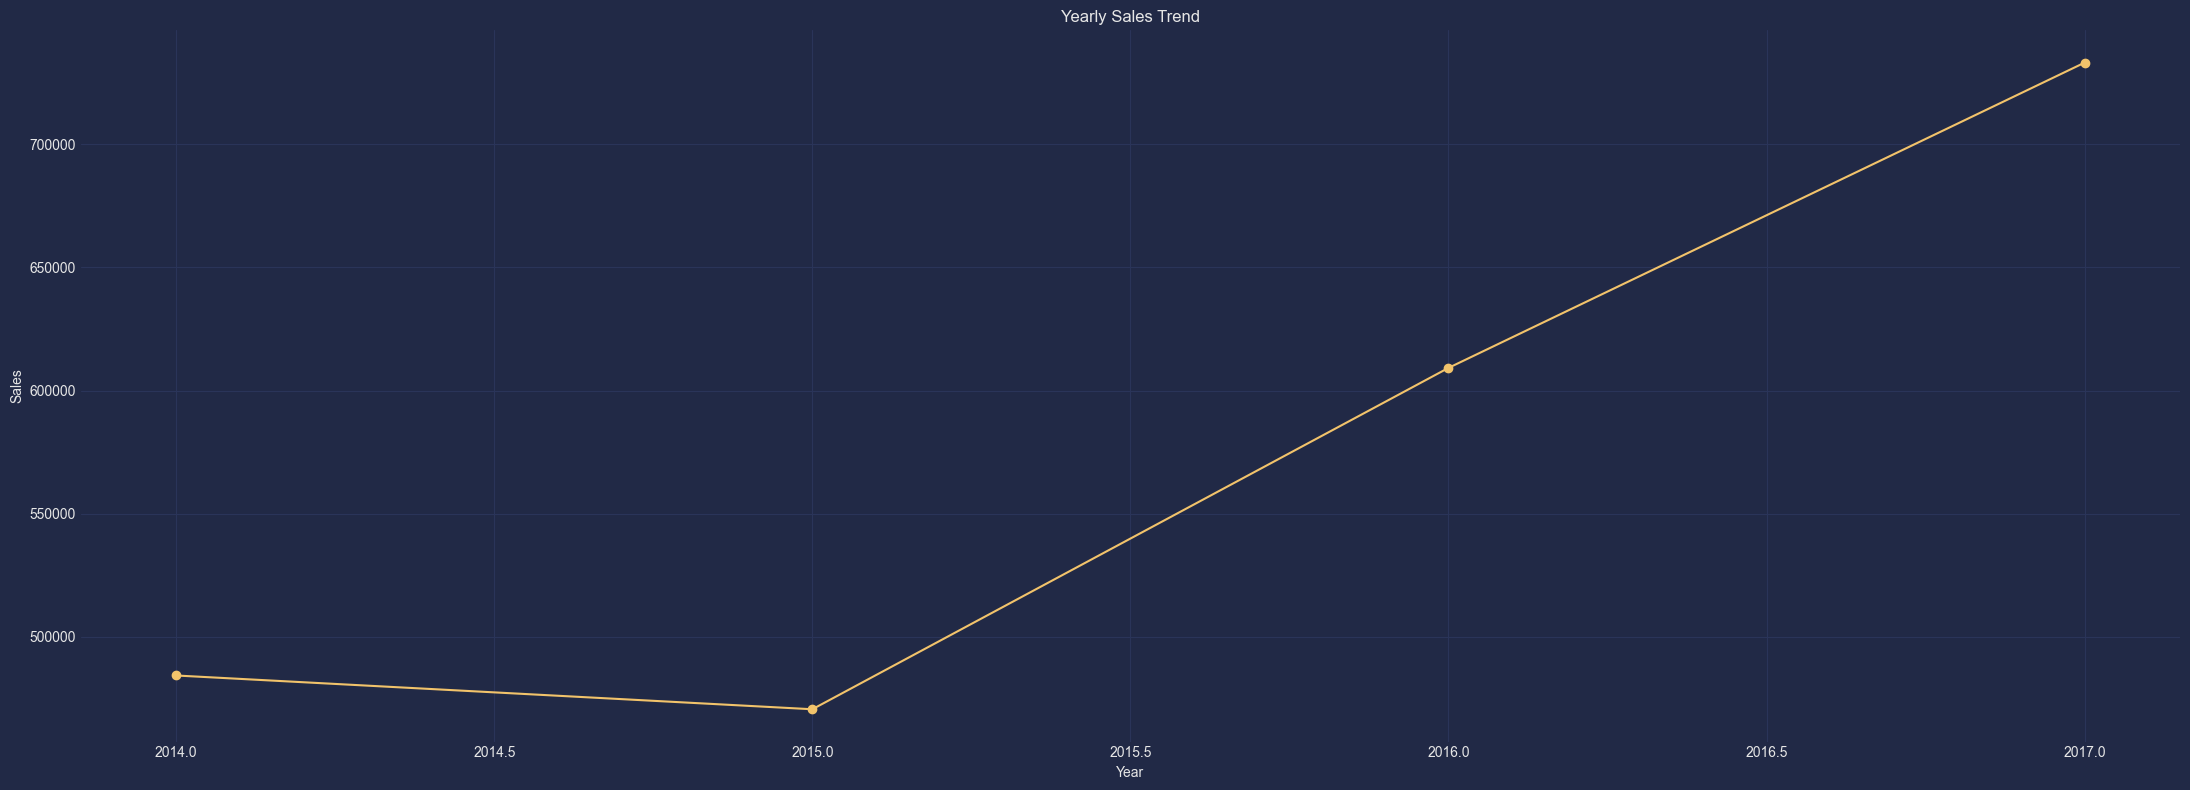

In [21]:
monthly_sales = df.groupby('Order Year')['Sales'].sum()
monthly_sales.plot(marker='o', linestyle='-',color='#F2C36B')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 3. How do sales vary across different regions, states, and cities? 🌎🛍️


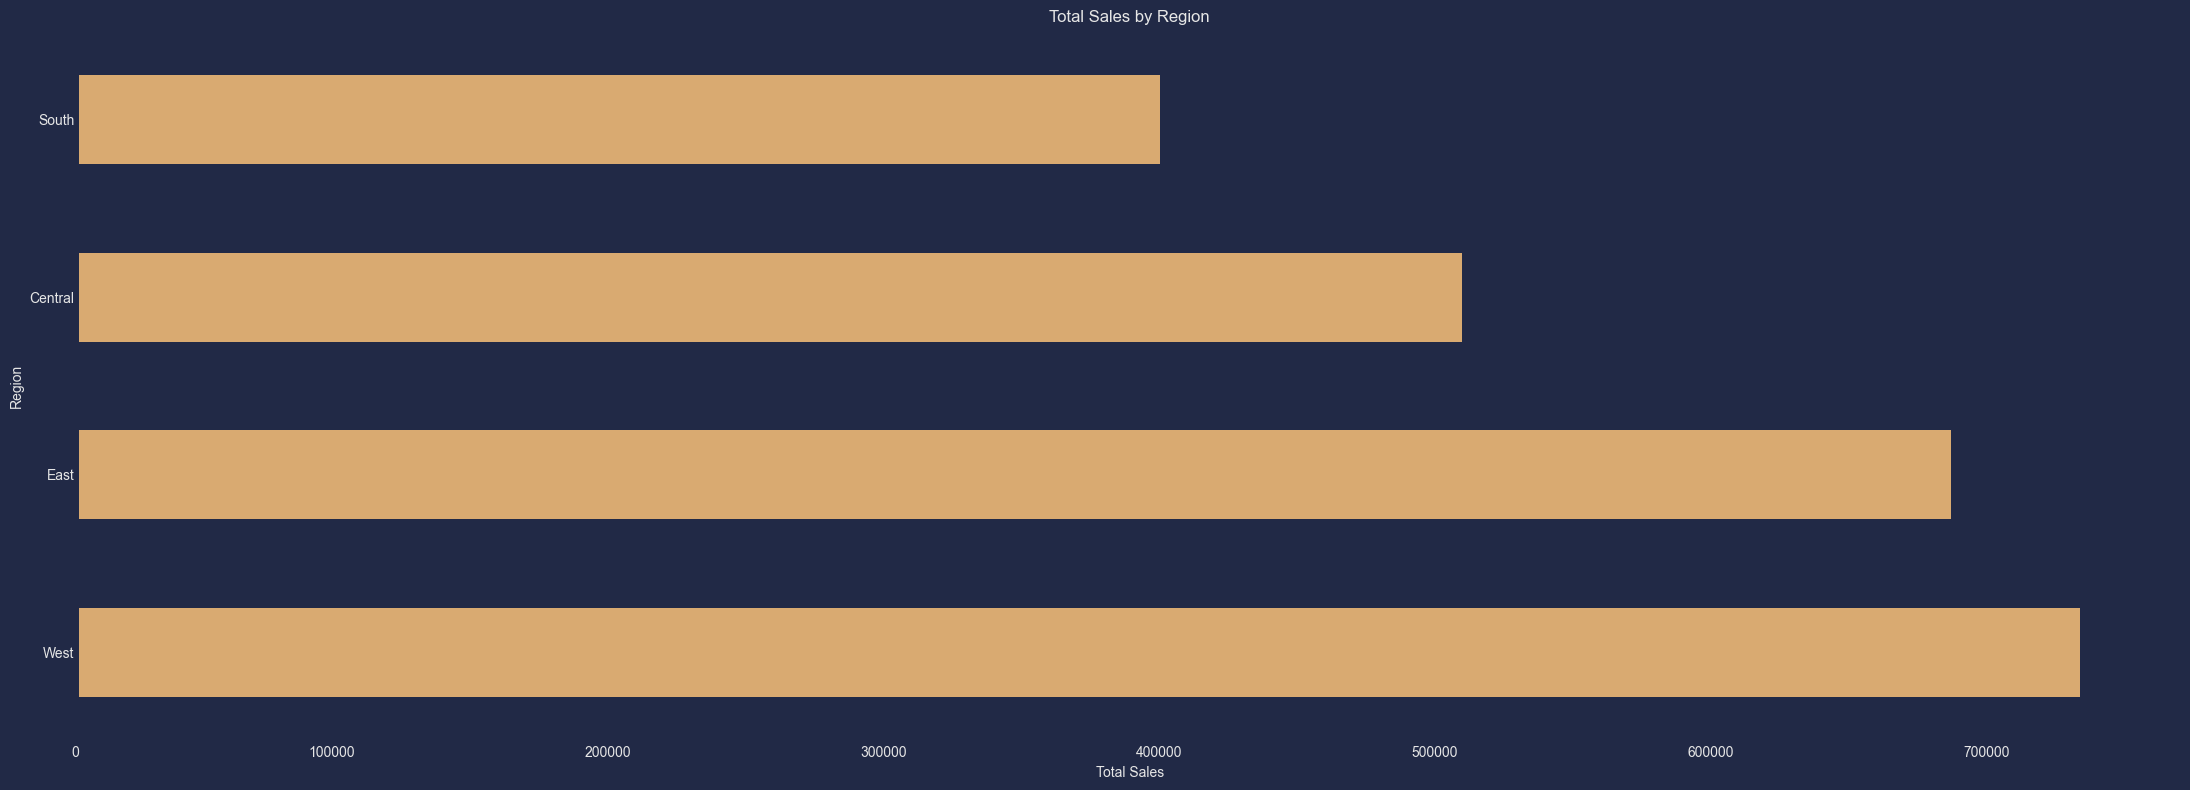

In [22]:
# Aggregate sales data by region, state, and city
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# Visualize sales by region

region_sales.plot(kind='barh', color='#D9AA71')
plt.title('Total Sales by Region')
plt.ylabel('Region')
plt.xlabel('Total Sales')
plt.xticks( ha='right')
plt.grid(None)
plt.tight_layout()
plt.show()



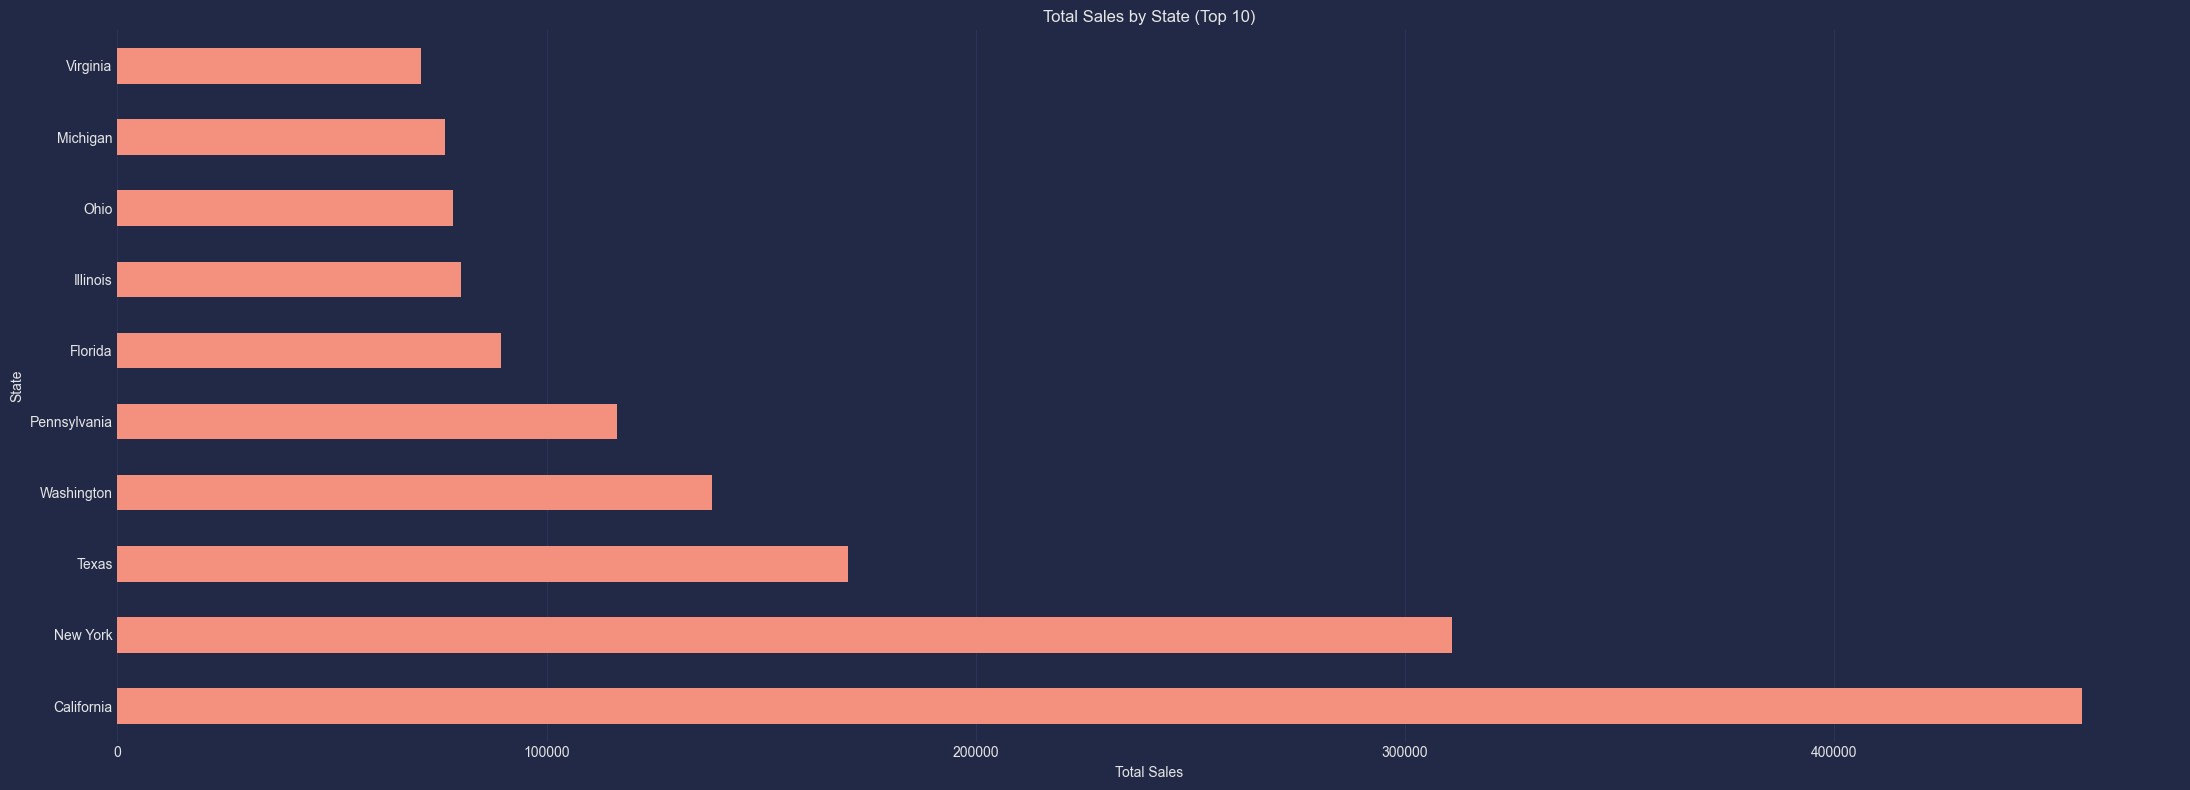

In [23]:
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
# Visualize sales by state (top 10 states)
state_sales.head(10).plot(kind='barh',color ='#f3907e')
plt.title('Total Sales by State (Top 10)')
plt.xlabel('Total Sales')
plt.ylabel('State')
# plt.xticks(rotation=0, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

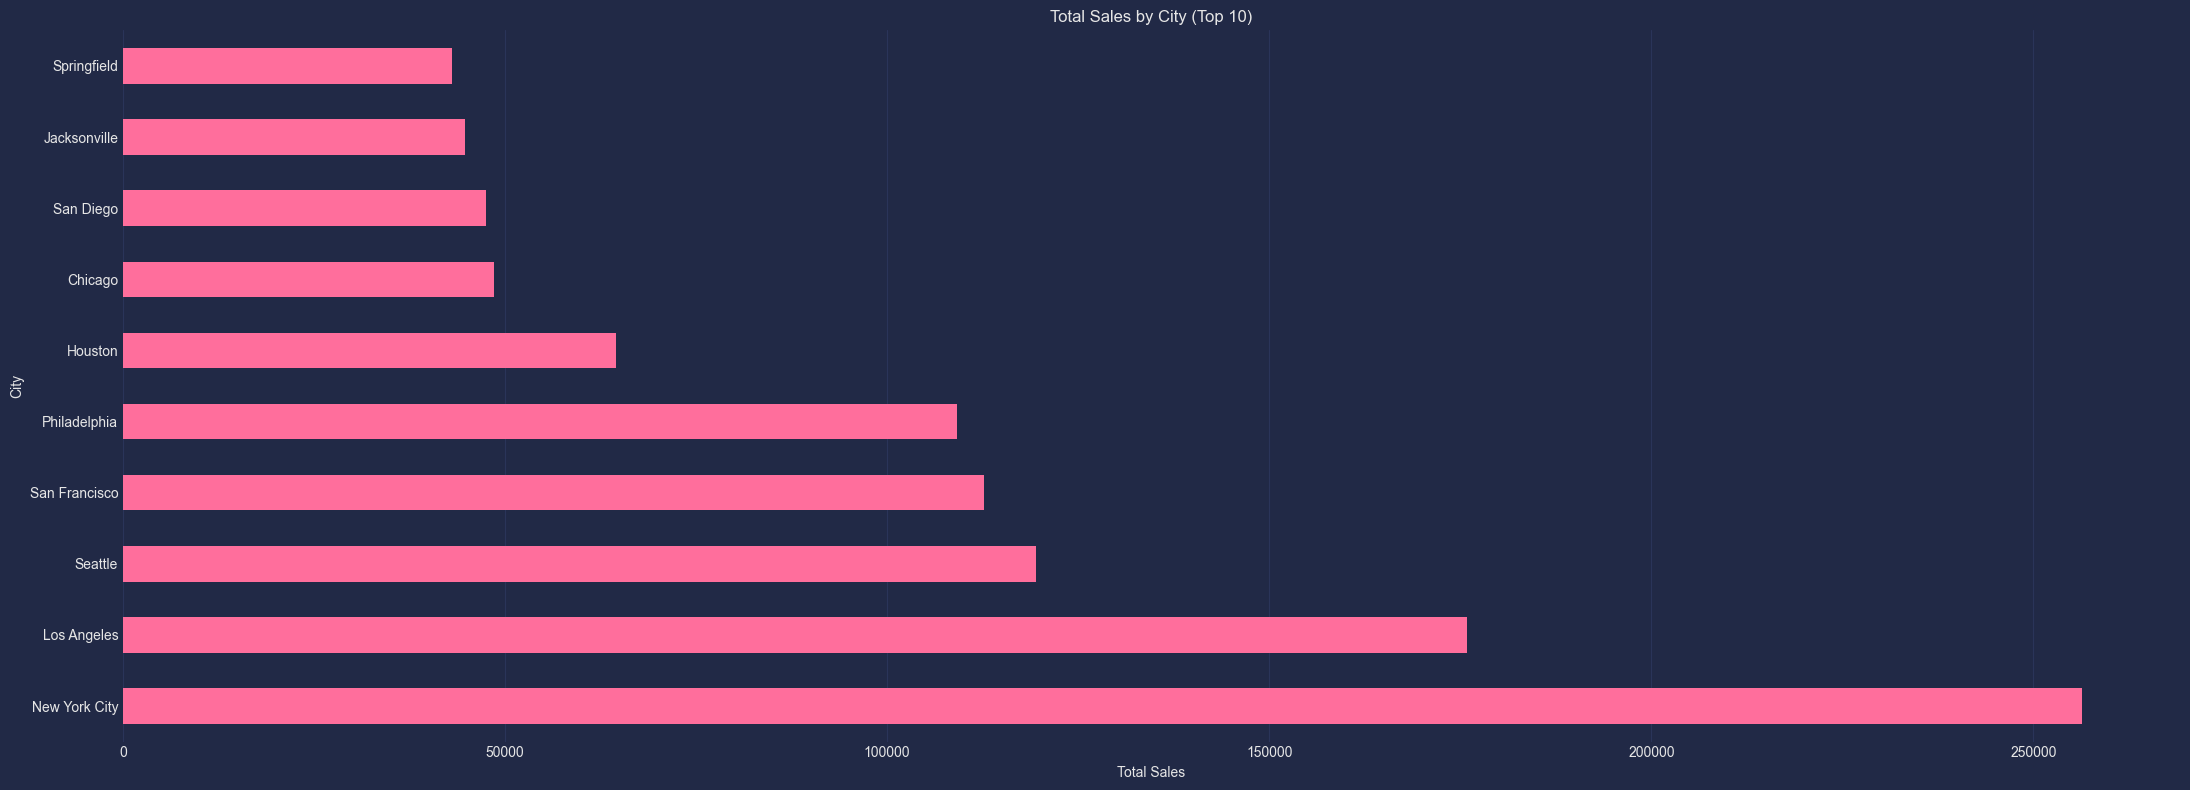

In [24]:
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)
# Visualize sales by city (top 10 cities)
city_sales.head(10).plot(kind='barh', color='#FF6E9C')
plt.title('Total Sales by City (Top 10)')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### 4. Which product categories and sub-categories contribute the most to overall sales?


In [25]:
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()
print("Total Sales by Product Category:")
print(sales_by_category)

Total Sales by Product Category:
          Category        Sales
0        Furniture  741999.7953
1  Office Supplies  719047.0320
2       Technology  836154.0330


In [26]:
fig = px.pie(sales_by_category, 
             values='Sales', 
             names='Category', 
             hole=0.5, 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')


fig.update_layout(
    title='Sales Distribution by Category', 
    title_font=dict(size=20),  
    title_font_color="#fefeff", 
    legend_title='Categories',  
    legend_font=dict(size=12), 
    legend_font_color="#7f848a",  
    font=dict(color="#ffffff"),
    margin=dict(l=20, r=20, t=50, b=20), 
    paper_bgcolor='#181036',  
    
)

fig.show()

In [27]:
subcategory_sales = df.groupby(['Sub-Category'])['Sales'].sum().sort_values(ascending=False)
pd.DataFrame(subcategory_sales, columns=['Sales']).reset_index().head(6)


,Sub-Category,Sales
0,Phones,330007.054
1,Chairs,328449.103
2,Storage,223843.608
3,Tables,206965.532
4,Binders,203412.733
5,Machines,189238.631


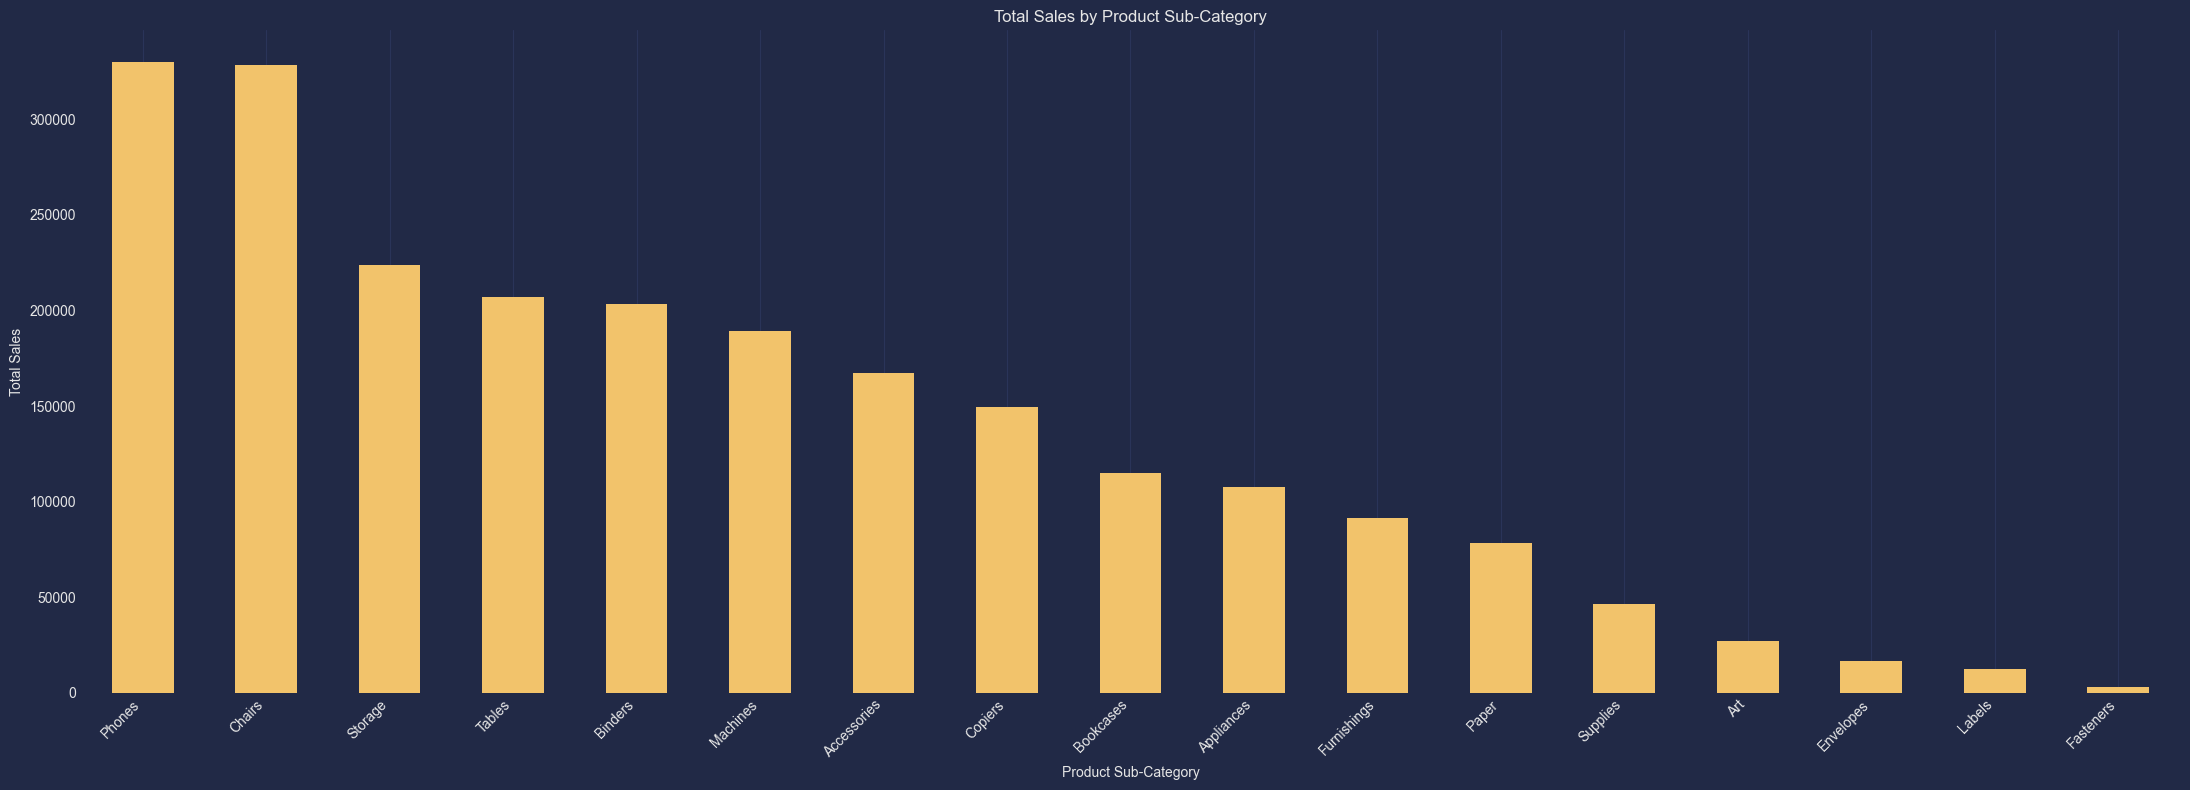

In [28]:
subcategory_sales.plot(kind='bar', color='#F2C36B')
plt.title('Total Sales by Product Sub-Category')
plt.xlabel('Product Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### 5.What are the top selling products in the superstore?


In [29]:
top_selling_products = pd.DataFrame( df.groupby(["Product Name"]).sum()["Sales"].sort_values(ascending=False)).reset_index()
total_sales = top_selling_products["Sales"].sum()
# Calculate percentage of total sales for each product
top_selling_products["Sales_Percentage"] = (top_selling_products["Sales"] / total_sales) * 100

top_selling_products.head()

,Product Name,Sales,Sales_Percentage
0,Canon imageCLASS 2200 Advanced Copier,61599.824,2.681517
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,1.195080
2,Cisco TelePresence System EX90 Videoconferenci...,22638.480,0.985481
3,HON 5400 Series Task Chairs for Big and Tall,21870.576,0.952053
4,GBC DocuBind TL300 Electric Binding System,19823.479,0.862941


#### 6. What is the impact of discounts and promotions on sales?


Plotting impact of discount on sales amount


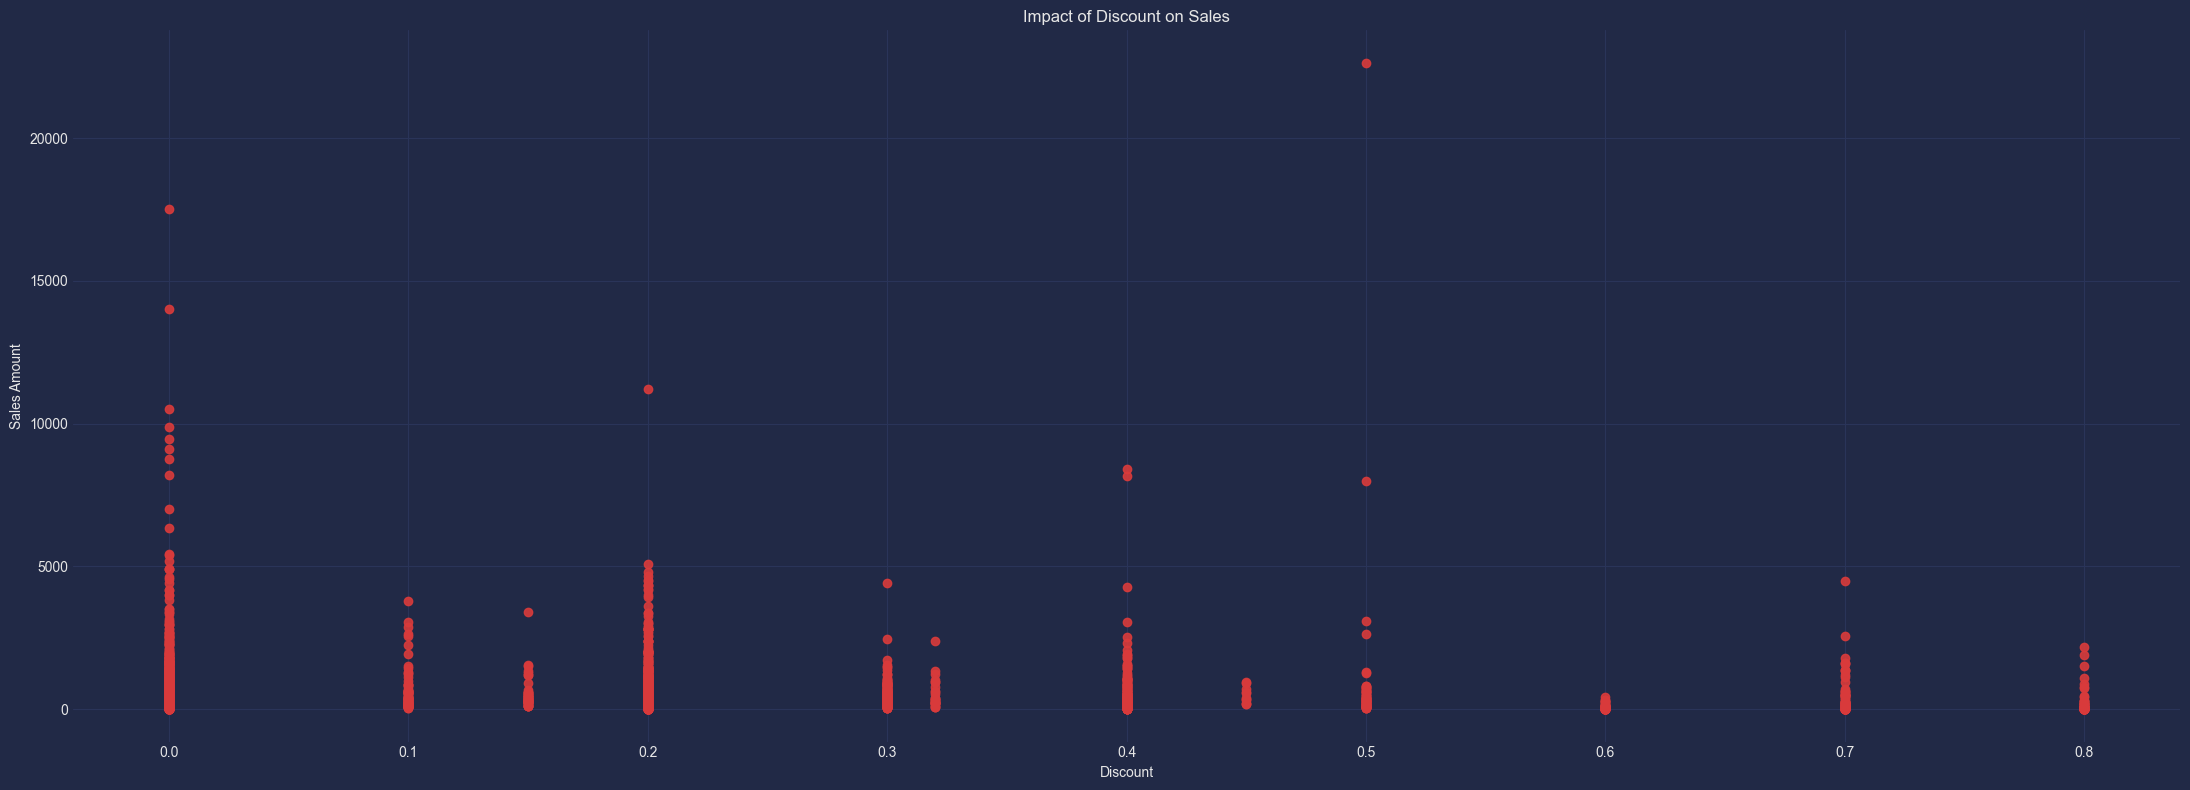

In [30]:
plt.scatter(df['Discount'], df['Sales'], color='#D93B3B', alpha=0.9)
plt.title('Impact of Discount on Sales')
plt.xlabel('Discount')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

Plotting impact of discount on sales quantity


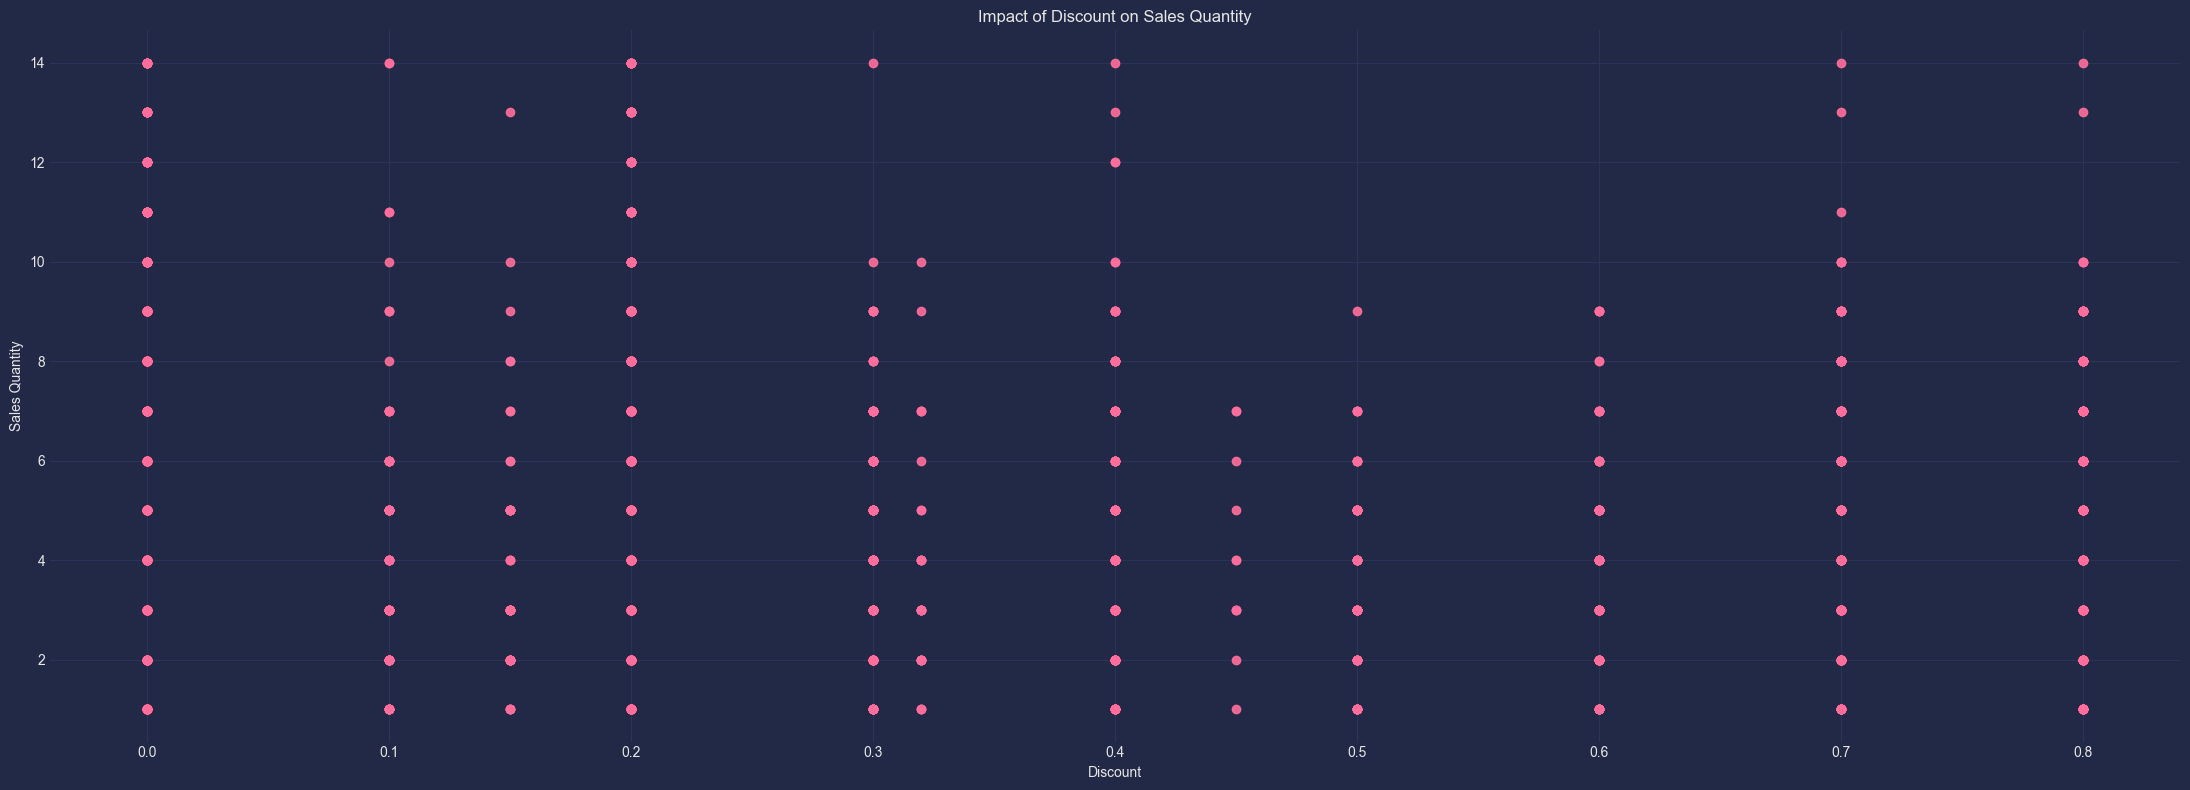

In [31]:
plt.scatter(df['Discount'], df['Quantity'], color='#FF6E9C', alpha=0.9)
plt.title('Impact of Discount on Sales Quantity')
plt.xlabel('Discount')
plt.ylabel('Sales Quantity')
plt.grid(True)
plt.tight_layout()
plt.show()

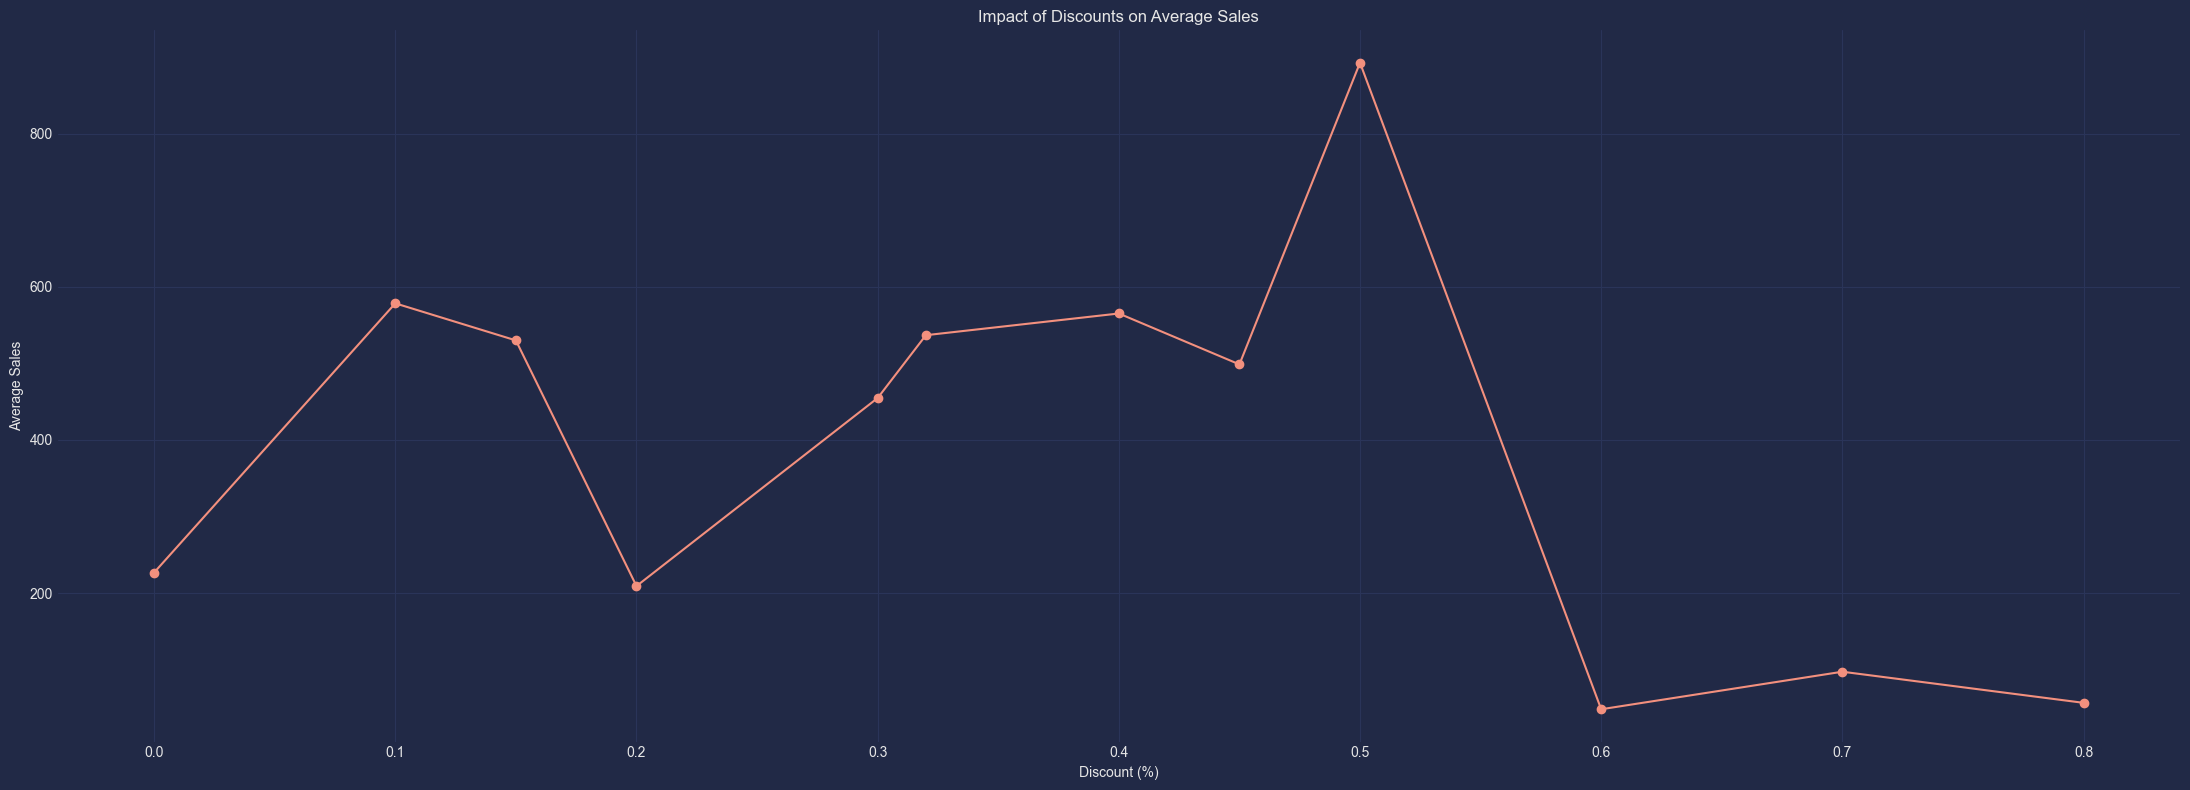

In [32]:
avg_sales_by_discount = df.groupby('Discount')['Sales'].mean()

plt.plot(avg_sales_by_discount.index, avg_sales_by_discount.values, color='#f3907e',marker='o', linestyle='-')
plt.title('Impact of Discounts on Average Sales')
plt.xlabel('Discount (%)')
plt.ylabel('Average Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

### Profit Analysis 💰📊

In this analysis, we'll explore the following questions:


#### 1. what is the distribution of profit across different states?🗺️


In [33]:
import geopandas as gpd
state_profit = pd.DataFrame(df.groupby('State')['Profit'].sum()).reset_index()
# Read the shapefile for US states
gdf = gpd.read_file('./map/tl_2023_us_state.shp')

# Merge the shapefile with your data based on state names
merged_gdf = gdf.set_index('NAME').join(state_profit.set_index('State'))


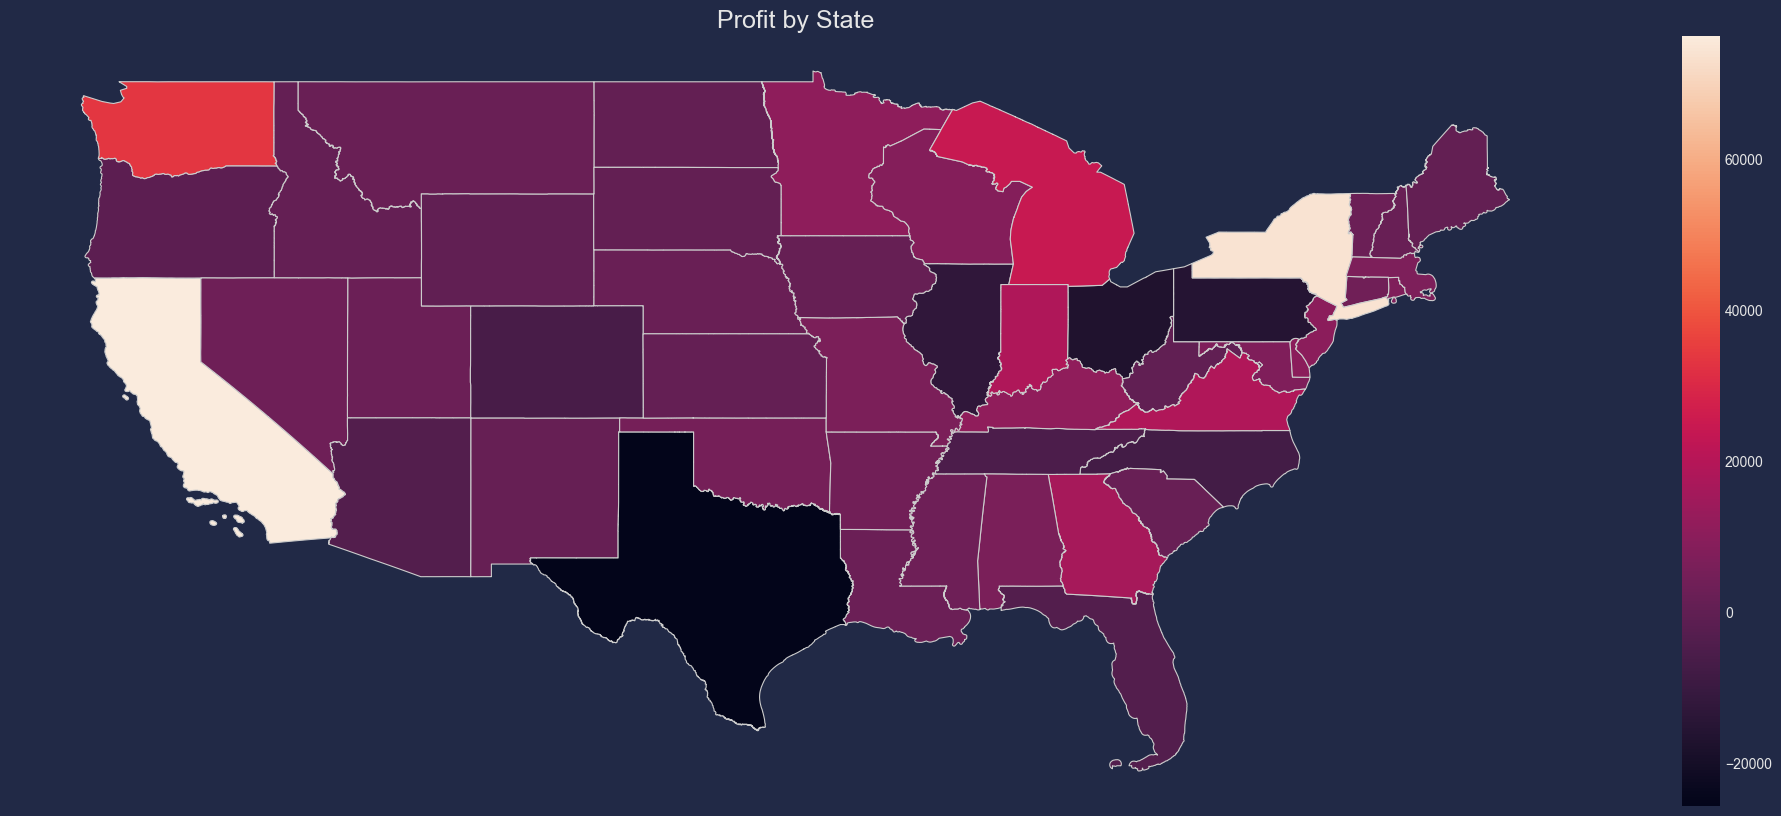

In [56]:
fig, ax = plt.subplots(figsize=(26, 10))

# Plot the map
merged_gdf.plot(column='Profit', ax=ax, legend=True, cmap ='rocket',linewidth=0.8, edgecolor='0.8')

ax.set_title('Profit by State',fontsize=18)
ax.axis('off')
plt.show()


In [57]:
states_negative_profit =state_profit.sort_values('Profit',ascending=True).head(10).reset_index(drop=True)

states_negative_profit

,State,Profit
0,Texas,-25729.3563
1,Ohio,-16971.3766
2,Pennsylvania,-15559.9603
3,Illinois,-12607.8870
4,North Carolina,-7490.9122
5,Colorado,-6527.8579
6,Tennessee,-5341.6936
7,Arizona,-3427.9246
8,Florida,-3399.3017
9,Oregon,-1190.4705


##### 1.1. Why Are the states experiencing a significantly negative profit?


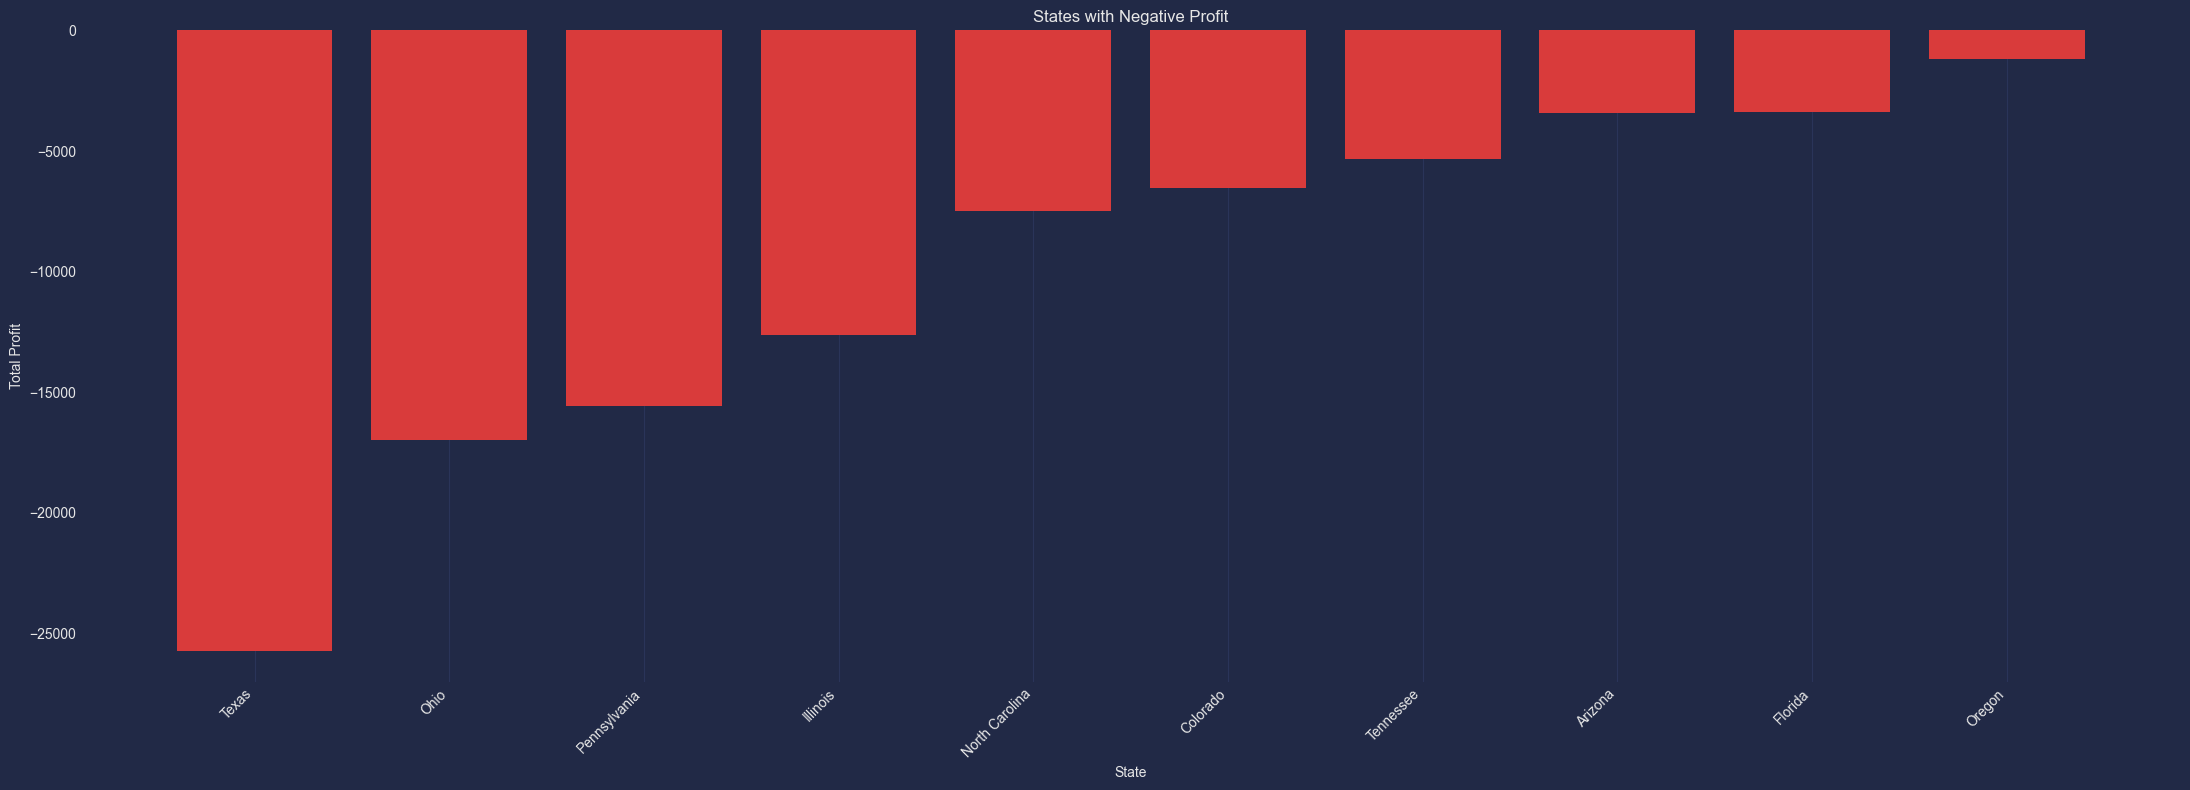

In [62]:

# Filter the dataset for states with negative profit
df_negative_profit = df[df['State'].isin(states_negative_profit.index)]

plt.bar(states_negative_profit.index, states_negative_profit.values, color='#D93B3B')
plt.title('States with Negative Profit')
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

###### we can focus on examining the relationship between discount levels and profit margins within these states


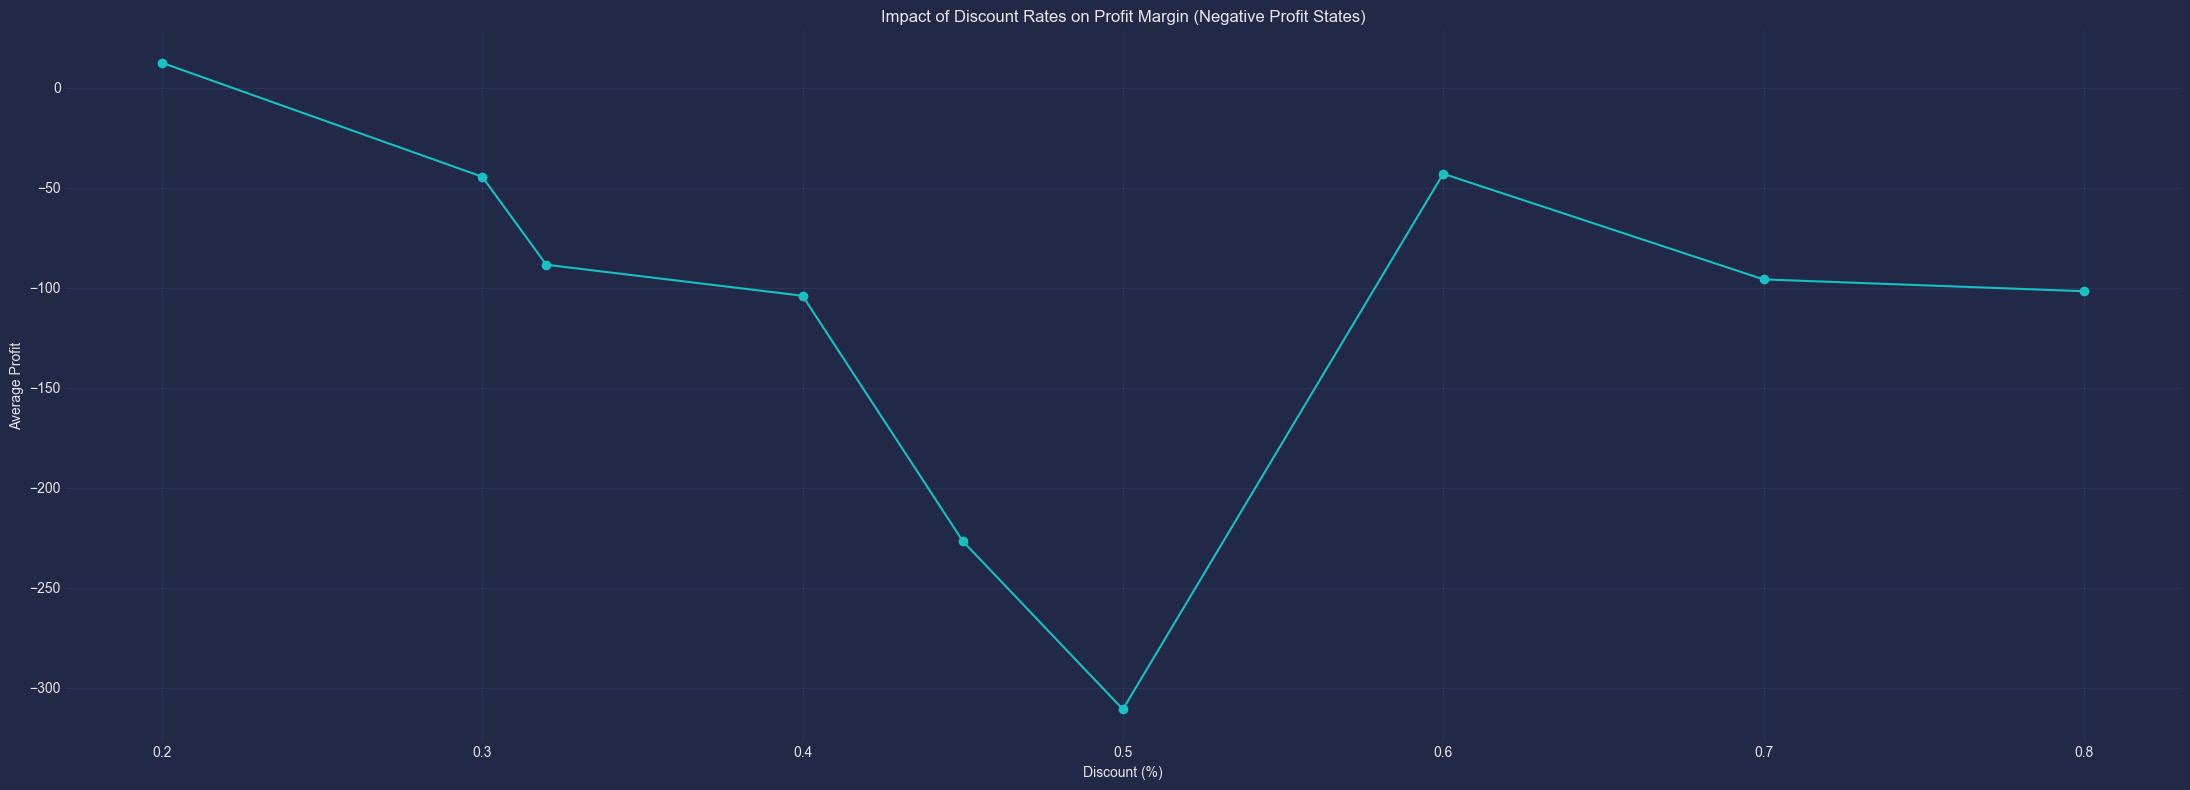

In [63]:
avg_profit_by_discount = df_negative_profit.groupby('Discount')['Profit'].mean()
plt.plot(avg_profit_by_discount.index, avg_profit_by_discount.values, marker='o', linestyle='-')
plt.title('Impact of Discount Rates on Profit Margin (Negative Profit States)')
plt.xlabel('Discount (%)')
plt.ylabel('Average Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

##### **Observations**

- **Discount Level of 0.20:** This discount level is associated with a positive average profit margin of approximately 12.39. This suggests that a moderate discount of 20% may be more sustainable in terms of maintaining profitability.

- **Higher Discount Levels (0.30 to 0.80):** As the discount level increases from 30% to 80%, the average profit margin becomes increasingly negative. This indicates that offering deeper discounts leads to reduced profitability or even losses in these states.

- **Significant Impact of 45% and 50% Discounts:** Discounts at 45% and 50% result in the most substantial declines in average profit margins, with values of -226.65 and -310.70, respectively. This highlights the potential risks of excessively high discounting strategies on profitability.

Based on these insights, it's crucial to balance discounting strategies with maintaining profitability, especially in states where negative profit margins are observed. Consider optimizing discount levels or exploring alternative strategies (such as targeted promotions, value-added services) to drive sales while preserving profit margins.

---


#### 2. What is the distribution of profit across different product categories?


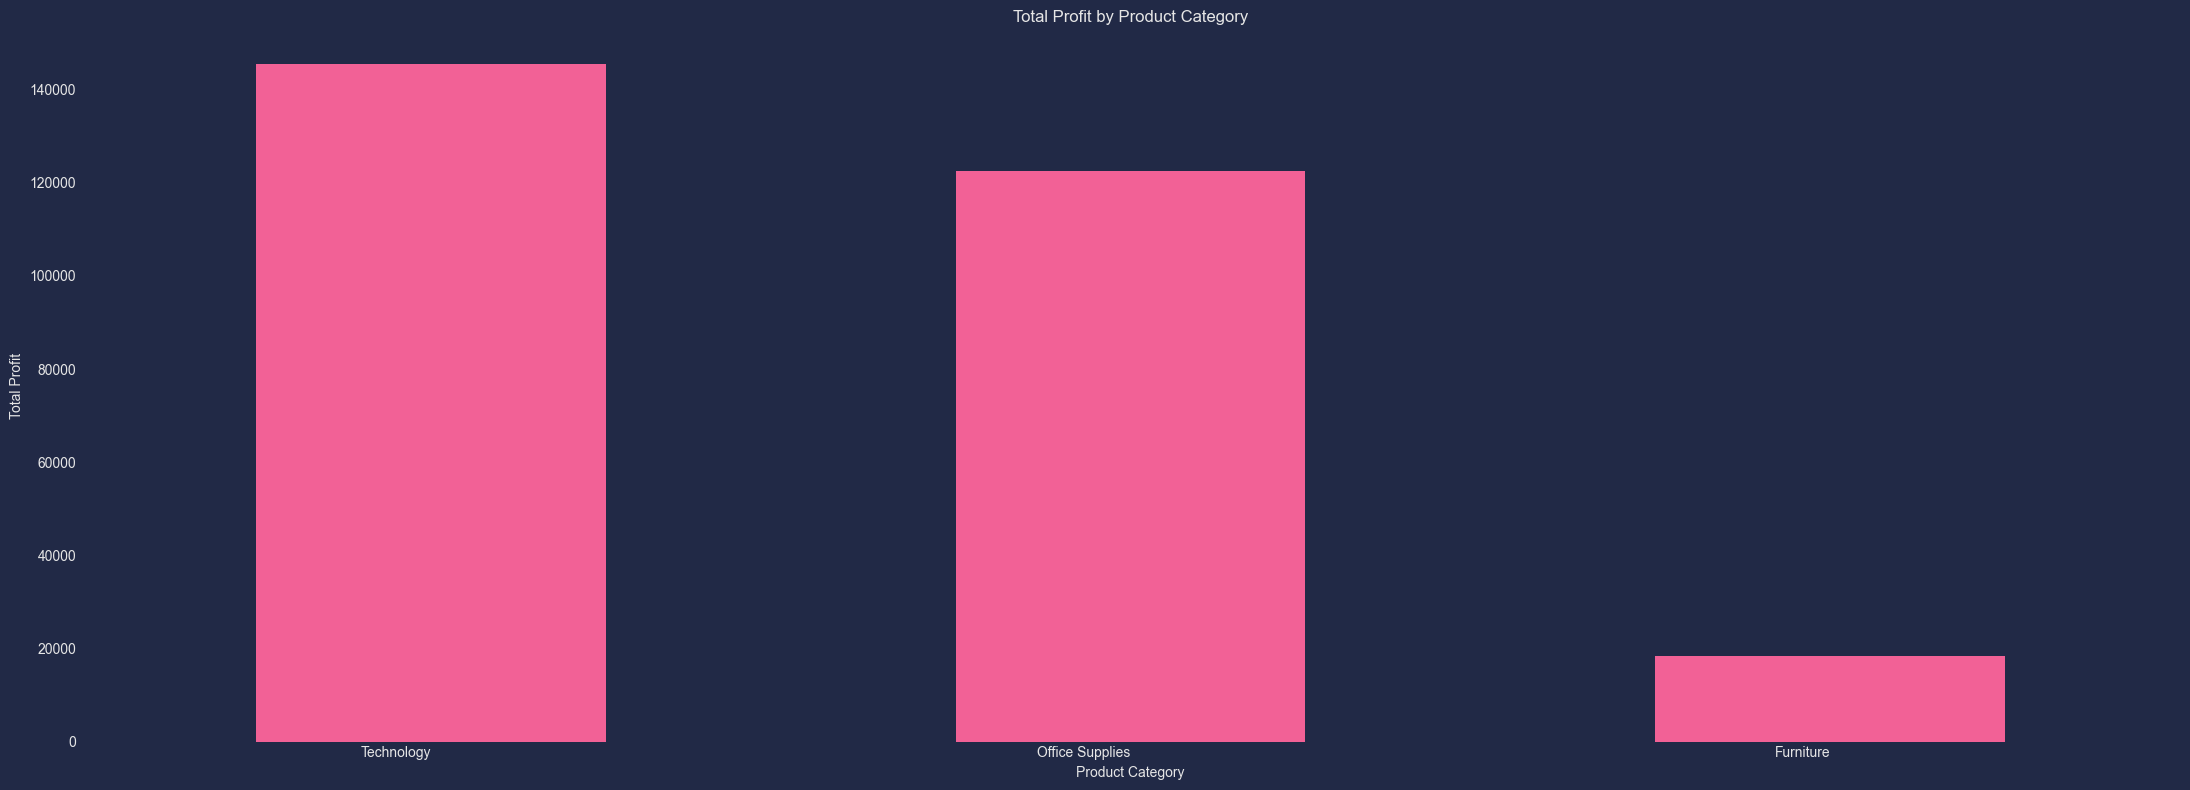

In [35]:
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
category_profit.plot(kind='bar',color='#f26196')
plt.title('Total Profit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=0, ha='right')
plt.grid(None)
plt.tight_layout()
plt.show()


#### 3. Are there any trends or patterns in profit margins over time?


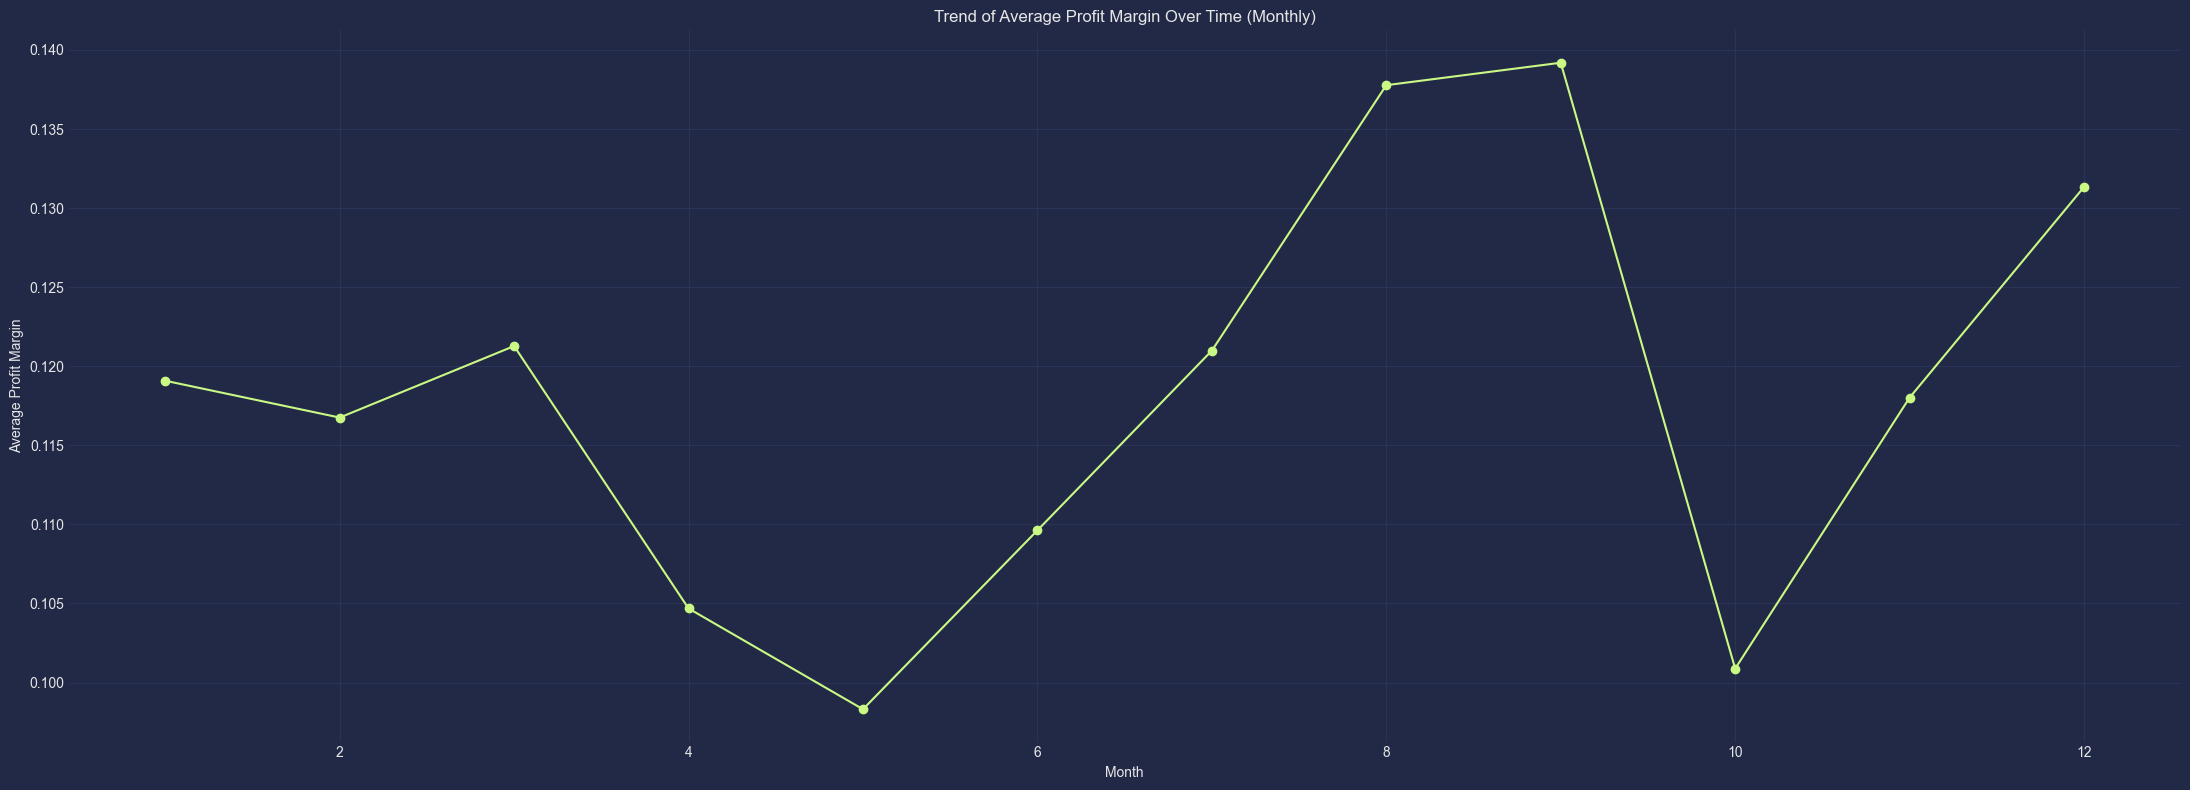

In [68]:
# Calculate profit margin (Profit / Sales)
df['Profit Margin'] = df['Profit'] / df['Sales']
avg_profit_margin_by_month = df.groupby(['Order Month'])['Profit Margin'].mean()

avg_profit_margin_by_month.plot(marker='o', linestyle='-', color='#CAF884')
plt.title('Trend of Average Profit Margin Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Average Profit Margin')
plt.grid(True)
plt.tight_layout()
plt.show()

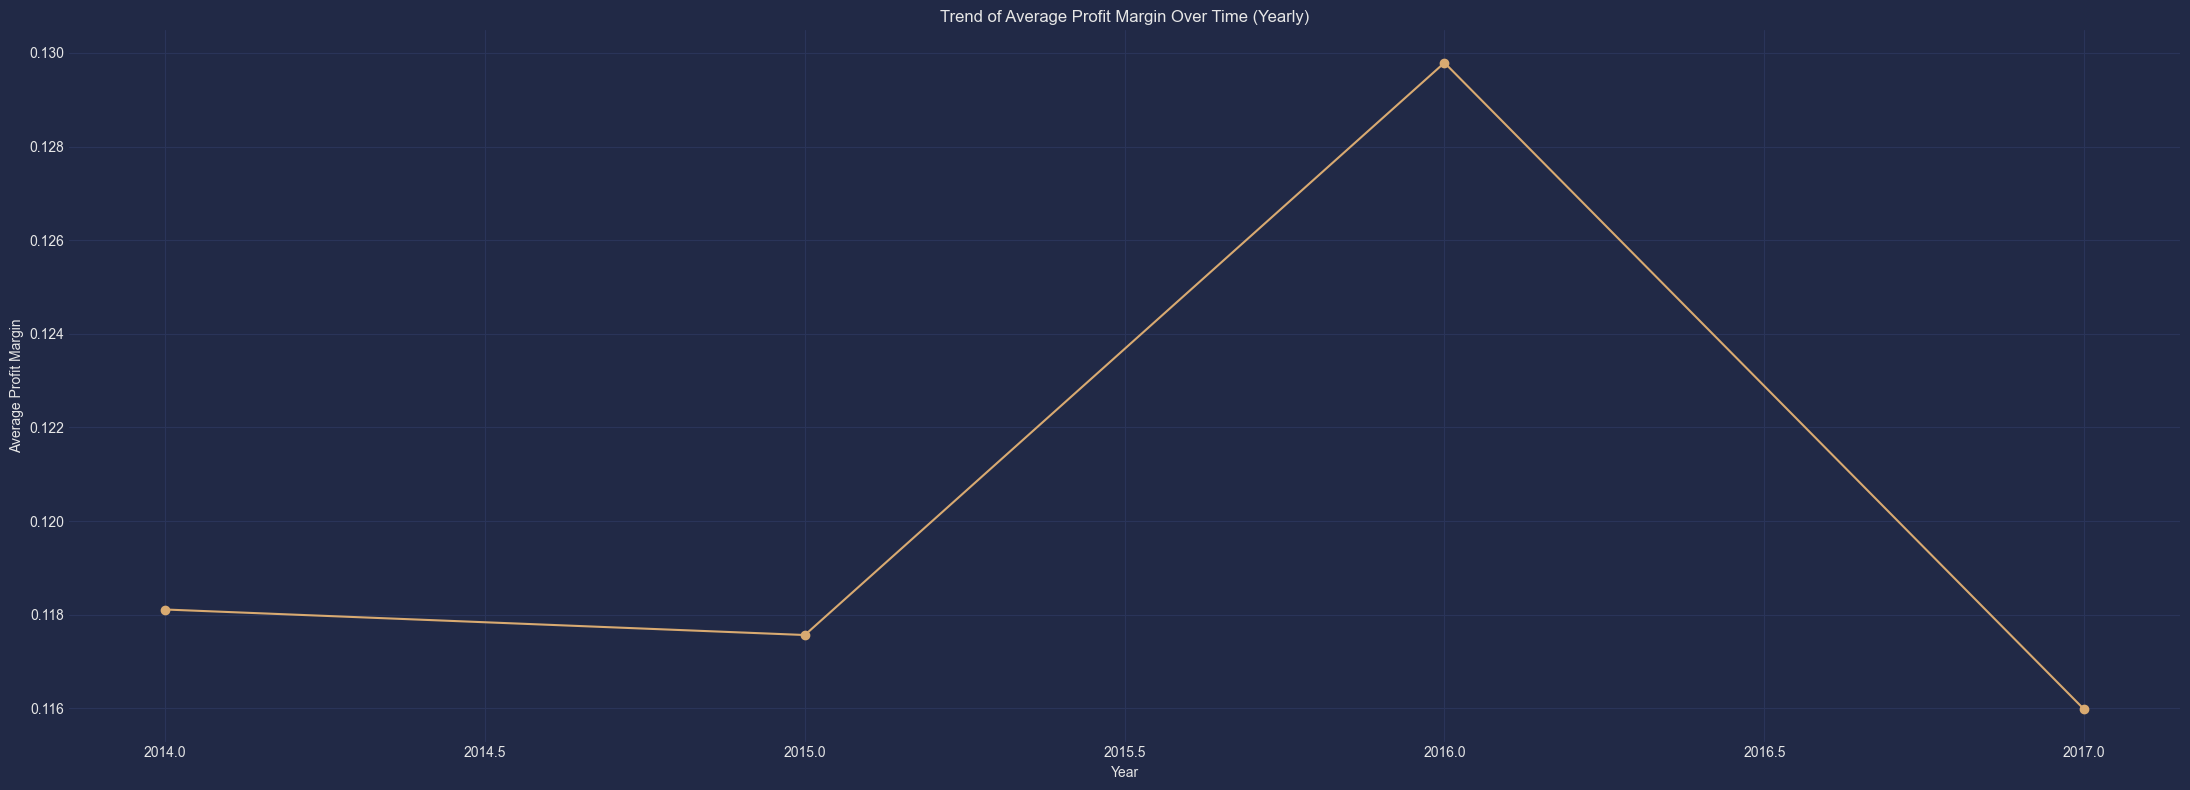

In [80]:
# Alternatively, you can analyze yearly trends
avg_profit_margin_by_year = df.groupby('Order Year')['Profit Margin'].mean()

# Plot the trend of average profit margin over time (yearly)
avg_profit_margin_by_year.plot(marker='o', linestyle='-', color='#D9AA71')
plt.title('Trend of Average Profit Margin Over Time (Yearly)')
plt.xlabel('Year')
plt.ylabel('Average Profit Margin')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 4. How do profit margins vary based on shipping mode or customer segment?


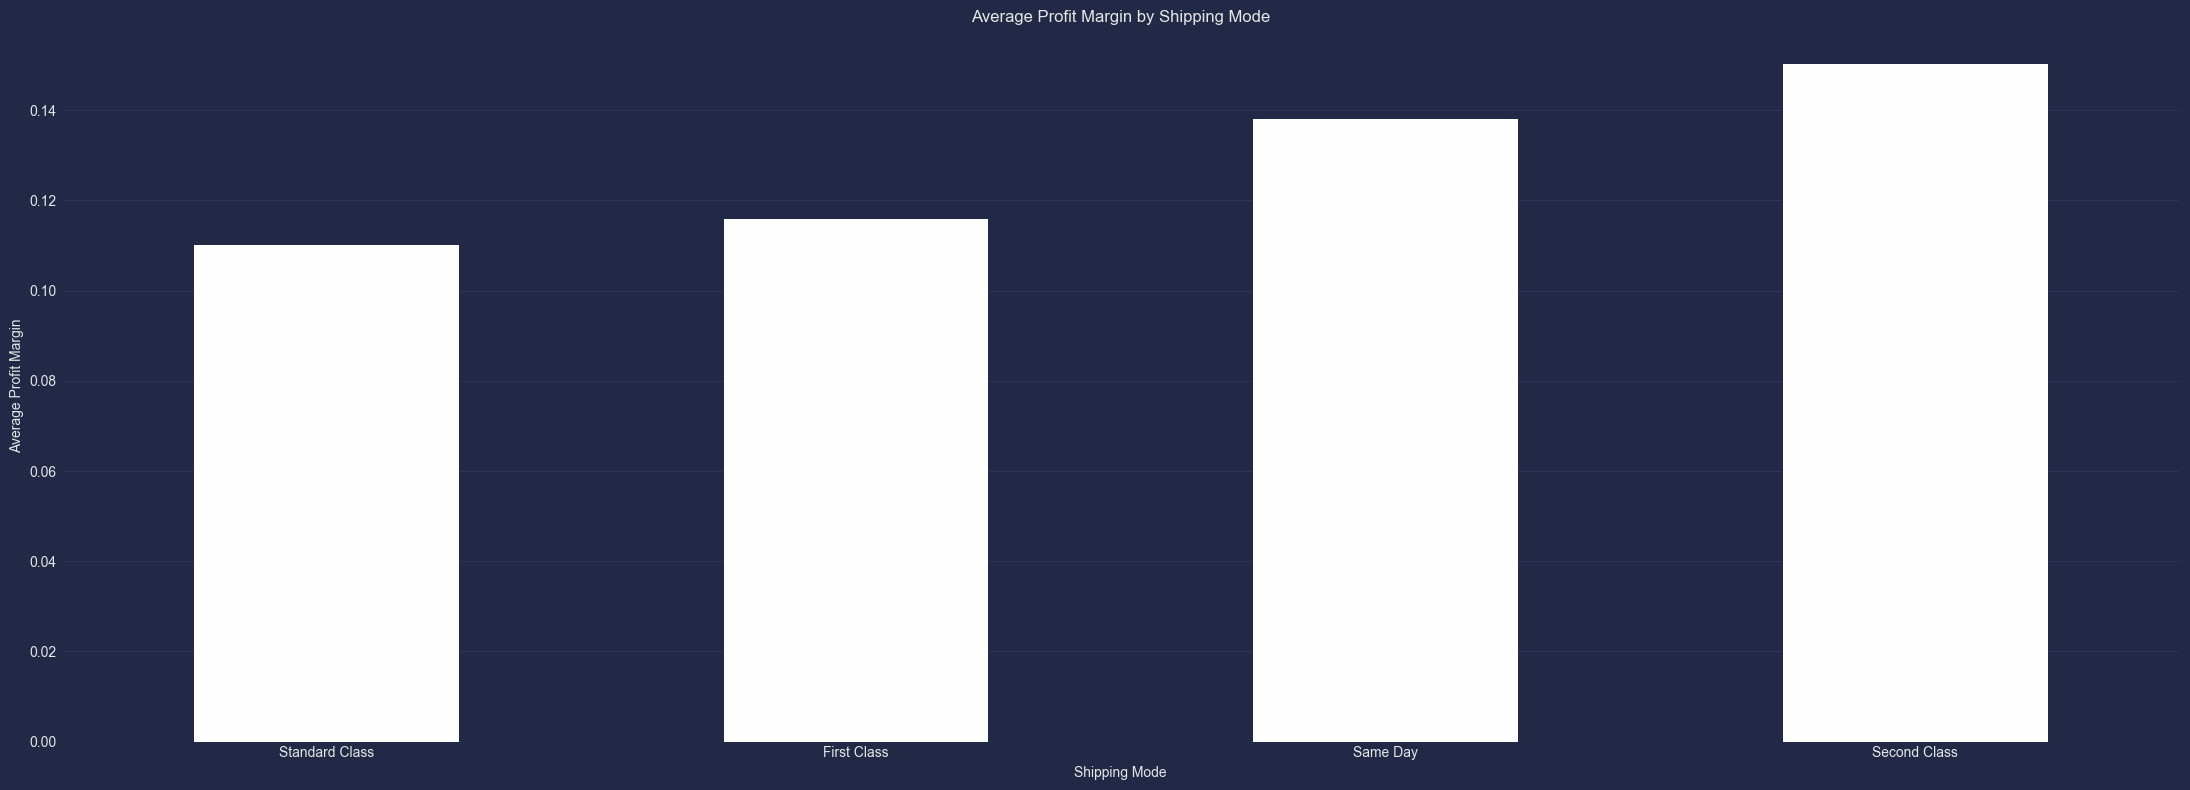

In [82]:
# Analyze profit margins based on shipping mode
avg_profit_margin_by_shipping = df.groupby('Ship Mode')['Profit Margin'].mean().sort_values()
avg_profit_margin_by_shipping.plot(kind='bar', color='#fefeff')
plt.title('Average Profit Margin by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Average Profit Margin')
plt.xticks(rotation=0)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

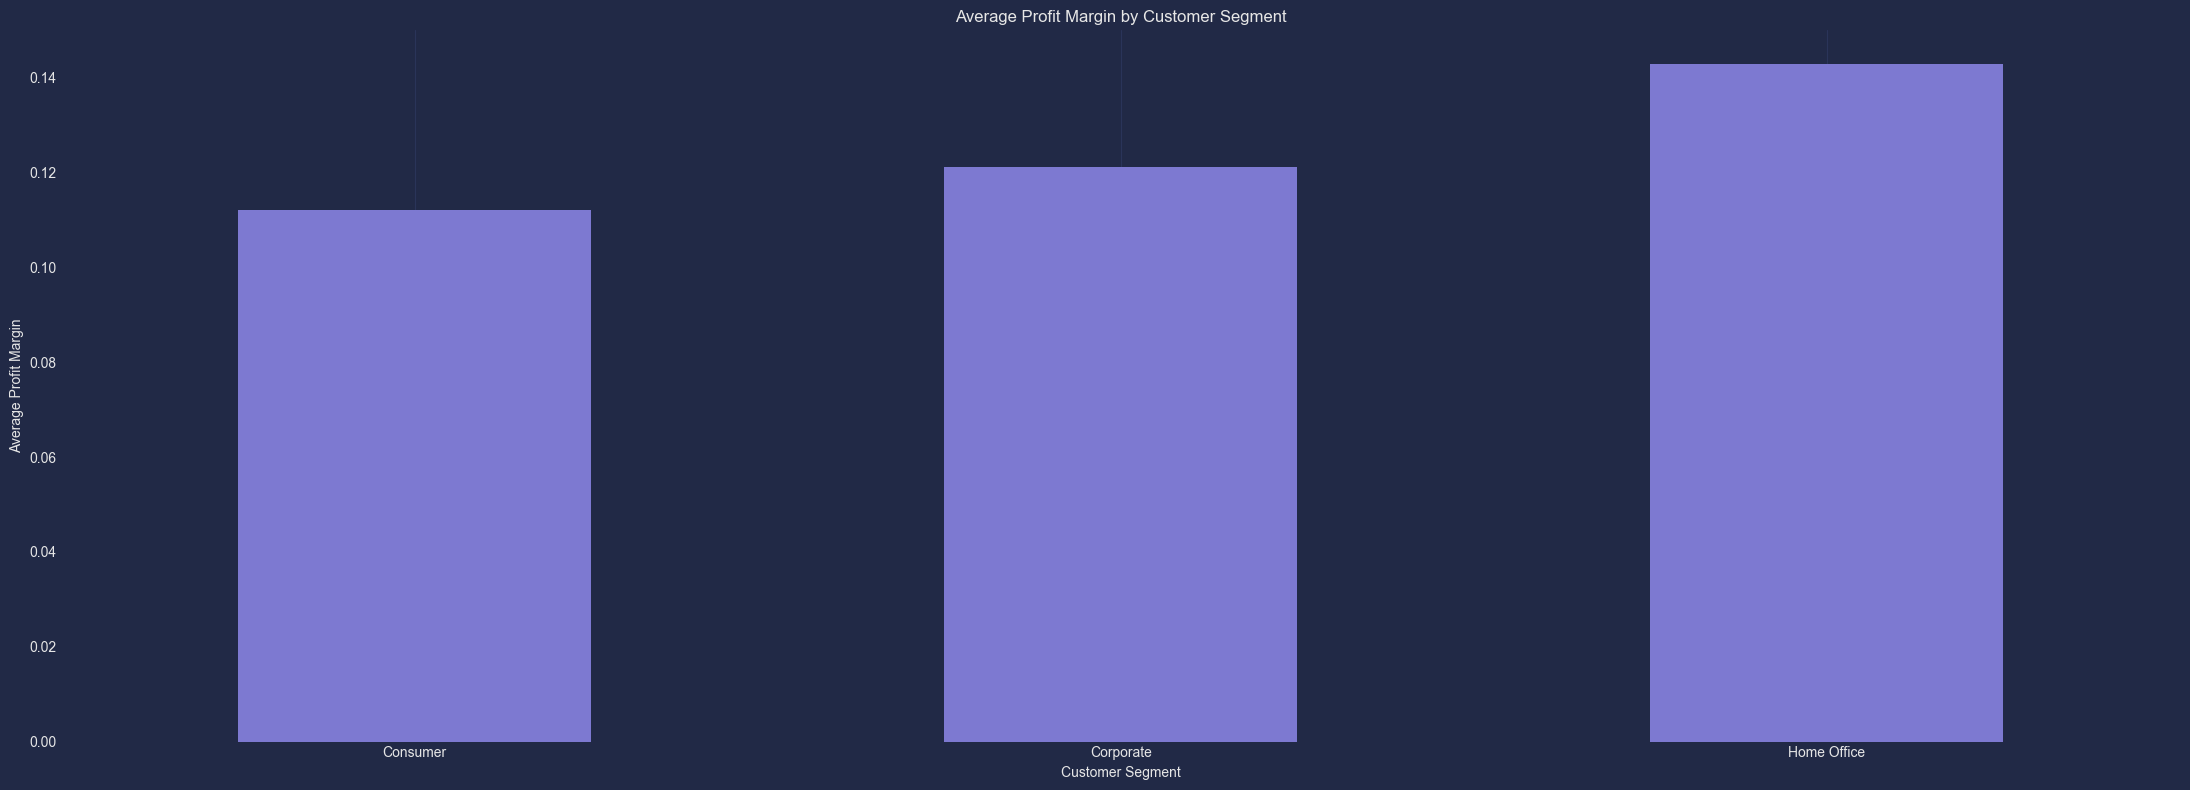

In [90]:
# Analyze profit margins based on customer segment
avg_profit_margin_by_segment = df.groupby('Segment')['Profit Margin'].mean().sort_values()
avg_profit_margin_by_segment.plot(kind='bar', color='#7d79d1')
plt.title('Average Profit Margin by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Profit Margin')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### 5. What is the average profit margin for each product category?


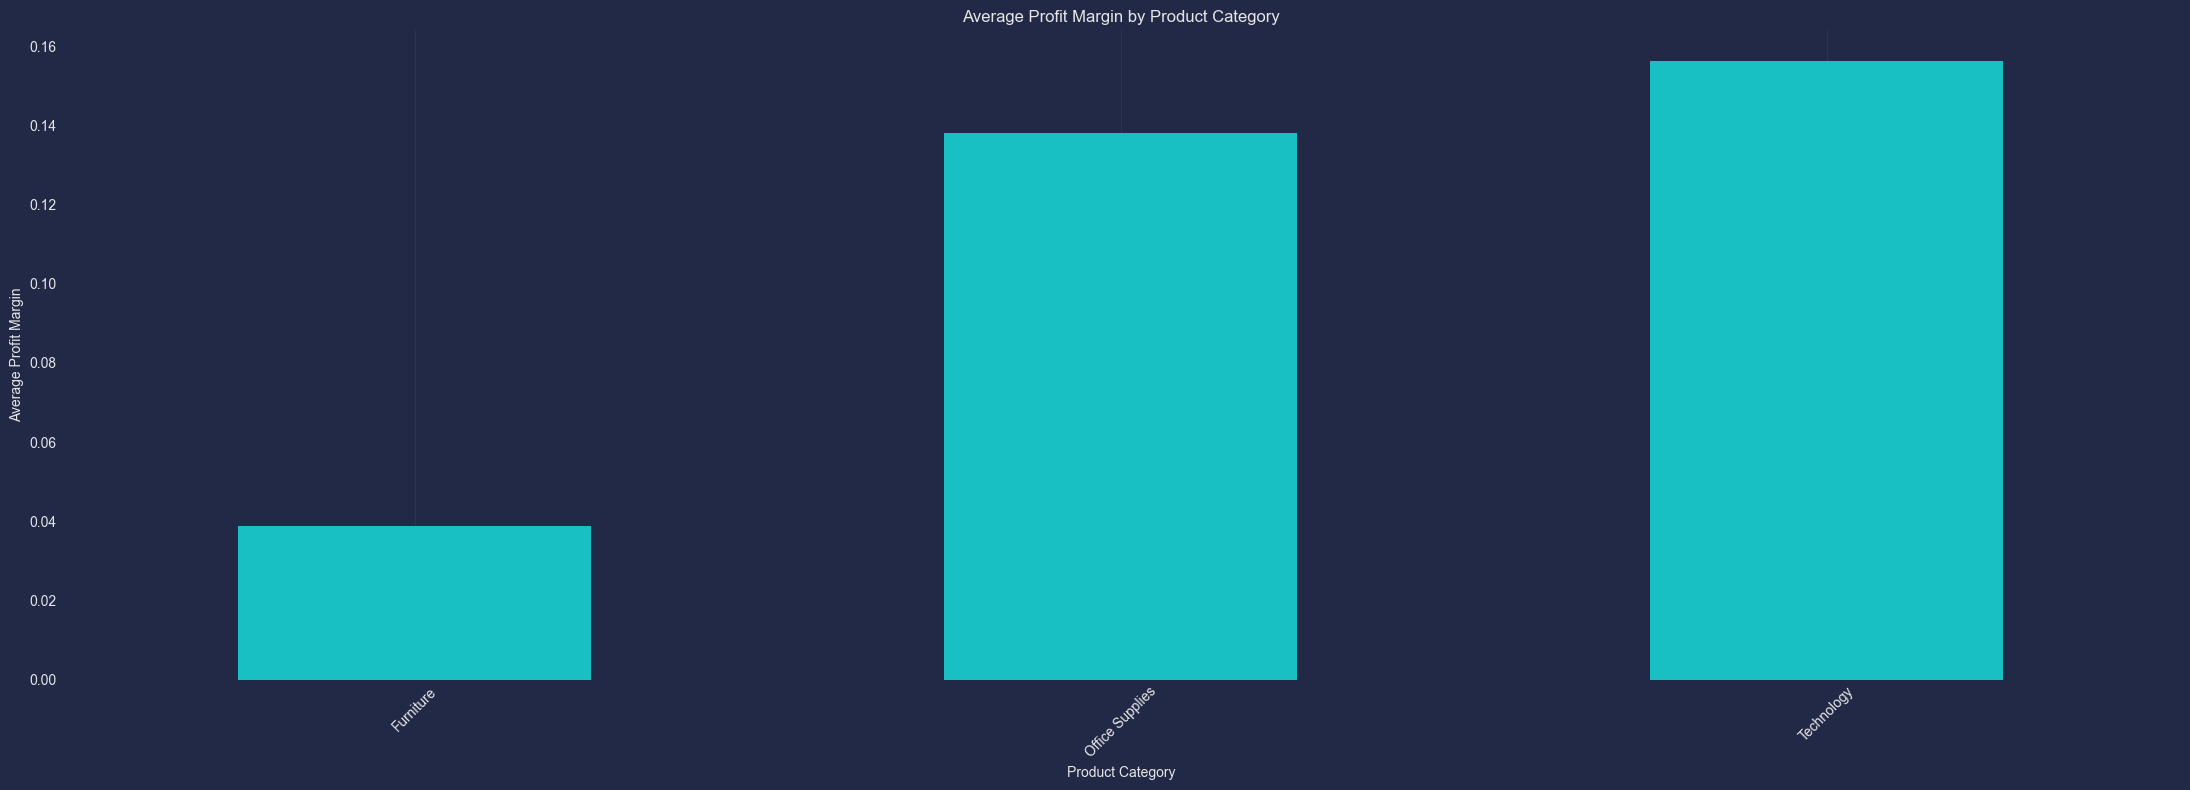

In [91]:
# Calculate average profit margin by product category
avg_profit_margin_by_category = df.groupby('Category')['Profit Margin'].mean().sort_values()
avg_profit_margin_by_category.plot(kind='bar', color='#18c0c4')
plt.title('Average Profit Margin by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Profit Margin')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### 6. Which category of products generates the highest revenue and profit?


In [92]:
category_revenue = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)

# Identify the category with the highest revenue and profit
highest_revenue_category = category_revenue.idxmax()
highest_profit_category = category_profit.idxmax()

# Print the category generating the highest revenue and profit
print(f"Category generating the highest revenue: {highest_revenue_category}")
print(f"Category generating the highest profit: {highest_profit_category}")

Category generating the highest revenue: Technology
Category generating the highest profit: Technology


#### 7. What are the top profitable products?


In [36]:
product_group = df.groupby(["Product Name"]).sum()["Profit"]

top_profit_products = product_group.sort_values(ascending=False).reset_index()

top_5_profit_products =pd.DataFrame(top_profit_products[:5])
top_5_profit_products

,Product Name,Profit
0,Canon imageCLASS 2200 Advanced Copier,25199.9280
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.0390
2,Hewlett Packard LaserJet 3310 Copier,6983.8836
3,Canon PC1060 Personal Laser Copier,4570.9347
4,HP Designjet T520 Inkjet Large Format Printer ...,4094.9766


#### 8. Are there specific product categories or regions where the company is consistently making a profit or incurring losses?


In [98]:
avg_profit_margin_by_category_region = df.groupby(['Category', 'Region'])['Profit Margin'].mean()

# Identify categories and regions with consistent profitability or losses
profitable_categories_regions = avg_profit_margin_by_category_region[avg_profit_margin_by_category_region > 0]

# Print categories and regions with consistent profitability
print("Categories and Regions with Consistent Profitability:")
profitable_categories_regions



Categories and Regions with Consistent Profitability:


Category         Region 
Furniture        East       0.092389
                 South      0.141662
                 West       0.097722
Office Supplies  East       0.206305
                 South      0.163165
                 West       0.285795
Technology       Central    0.175124
                 East       0.126246
                 South      0.189488
                 West       0.153211
Name: Profit Margin, dtype: float64

In [103]:
loss_categories_regions = avg_profit_margin_by_category_region[avg_profit_margin_by_category_region < 0]

# Print categories and regions with consistent losses
print("\nCategories and Regions with Consistent Losses:")
loss_categories_regions


Categories and Regions with Consistent Losses:


Category         Region 
Furniture        Central   -0.185836
Office Supplies  Central   -0.158879
Name: Profit Margin, dtype: float64

#### 9. What is the profit margin for each product category?


In [101]:
df['Profit Margin (%)'] = (df['Profit'] / df['Sales']) * 100

# Calculate average profit margin by product category
avg_profit_margin_by_category = df.groupby('Category')['Profit Margin (%)'].mean().sort_values()

# Print the average profit margin for each product category
print("Average Profit Margin (%) by Product Category:\n")

print(avg_profit_margin_by_category)

Average Profit Margin (%) by Product Category:

Category
Furniture           3.878353
Office Supplies    13.803029
Technology         15.613805
Name: Profit Margin (%), dtype: float64


### Discount Analysis 🛍️📉

This section focuses on analyzing the impact of different discount levels on profit margins and overall profitability. 🛍️📉


#### 1. Is there a correlation between discount offered and sales/profit?


In [105]:
correlation_sales = df['Discount'].corr(df['Sales'])

# Calculate the correlation between discount and profit
correlation_profit = df['Discount'].corr(df['Profit'])

print(f"Pearson Correlation Coefficient between Discount and Sales: {correlation_sales:.2f}")
print(f"Pearson Correlation Coefficient between Discount and Profit: {correlation_profit:.2f}")

Pearson Correlation Coefficient between Discount and Sales: -0.03
Pearson Correlation Coefficient between Discount and Profit: -0.22


##### Discount and Sales Correlation

The correlation coefficient of -0.03 between discount and sales suggests that changes in the discount amount are not strongly related to changes in sales volume.

##### Discount and Profit Correlation

The correlation coefficient of -0.22 between discount and profit indicates a slightly stronger but still weak negative relationship. This implies that offering higher discounts may lead to a slight decrease in profit margins.

---


#### 2. What is the impact of discounts on profit margins?


In [106]:
avg_profit_margin_by_discount = df.groupby('Discount')['Profit Margin'].mean()

# Print the average profit margins for different discount levels
print("Average Profit Margins by Discount Level:")
print(avg_profit_margin_by_discount)

Average Profit Margins by Discount Level:
Discount
0.00    0.340160
0.10    0.155792
0.15    0.034163
0.20    0.176839
0.30   -0.115481
          ...   
0.45   -0.454545
0.50   -0.549091
0.60   -0.689130
0.70   -0.794737
0.80   -1.825000
Name: Profit Margin, Length: 12, dtype: float64


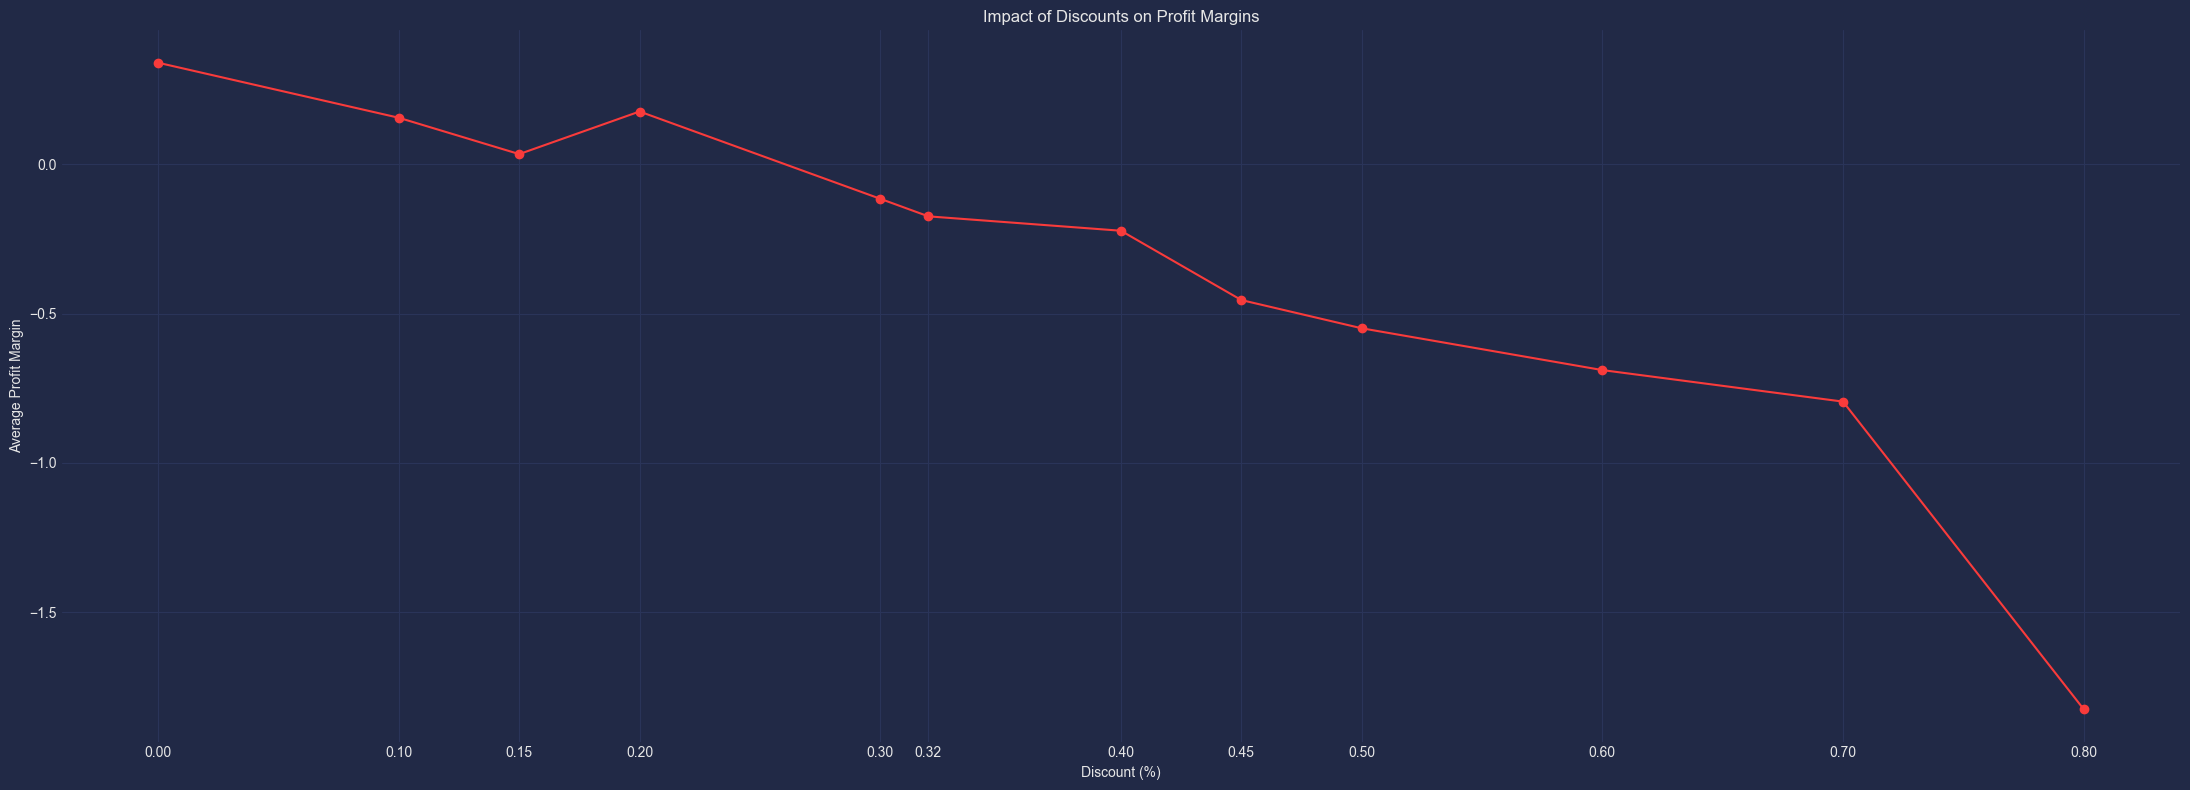

In [127]:
plt.plot(avg_profit_margin_by_discount.index, avg_profit_margin_by_discount.values, marker='o', linestyle='-', color='#f93B3B')
plt.title('Impact of Discounts on Profit Margins')
plt.xlabel('Discount (%)')
plt.ylabel('Average Profit Margin')
plt.grid(True)
plt.xticks(avg_profit_margin_by_discount.index)  
plt.tight_layout()
plt.show()

#### 3. Are there any specific product categories where offering discounts leads to higher sales?


In [118]:
data = df[['Category', 'Discount', 'Sales']]
avg_sales_by_category_discount = data.groupby(['Category', 'Discount'])['Sales'].mean()

categories_with_higher_sales = {}
for category in data['Category'].unique():
    category_data = avg_sales_by_category_discount.loc[category]
    max_increase = category_data.max() - category_data.min()
    if max_increase > 0:
        categories_with_higher_sales[category] = max_increase


print("Product Categories Where Offering Discounts Leads to Higher Sales:\n")
for category, increase in categories_with_higher_sales.items():
    discount_percent = avg_sales_by_category_discount.loc[category].idxmax() * 100
    print(f"- {category}: Max Sales Increase with {discount_percent:.0f}% Discount = ${increase:.2f}")


Product Categories Where Offering Discounts Leads to Higher Sales:

- Furniture: Max Sales Increase with 10% Discount = $565.46
- Office Supplies: Max Sales Increase with 10% Discount = $213.71
- Technology: Max Sales Increase with 50% Discount = $2786.80


#### 4. Compare sales and profit for products with different discount levels.


In [123]:
data = df[['Discount', 'Sales', 'Profit']]
# Group data by discount levels and calculate average sales and profit
avg_sales_profit_by_discount = data.groupby('Discount').agg({'Sales': 'mean', 'Profit': 'mean'})

# Print the average sales and profit for different discount levels
print("Average Sales and Profit by Discount Levels:")
avg_sales_profit_by_discount


Average Sales and Profit by Discount Levels:


,Sales,Profit
Discount,,
0.00,226.742074,66.900292
0.10,578.397351,96.055074
0.15,529.971567,27.288298
0.20,209.076940,24.702572
0.30,454.742974,-45.679636
...,...,...
0.45,498.634000,-226.646464
0.50,892.705152,-310.703456
0.60,48.150000,-43.077212


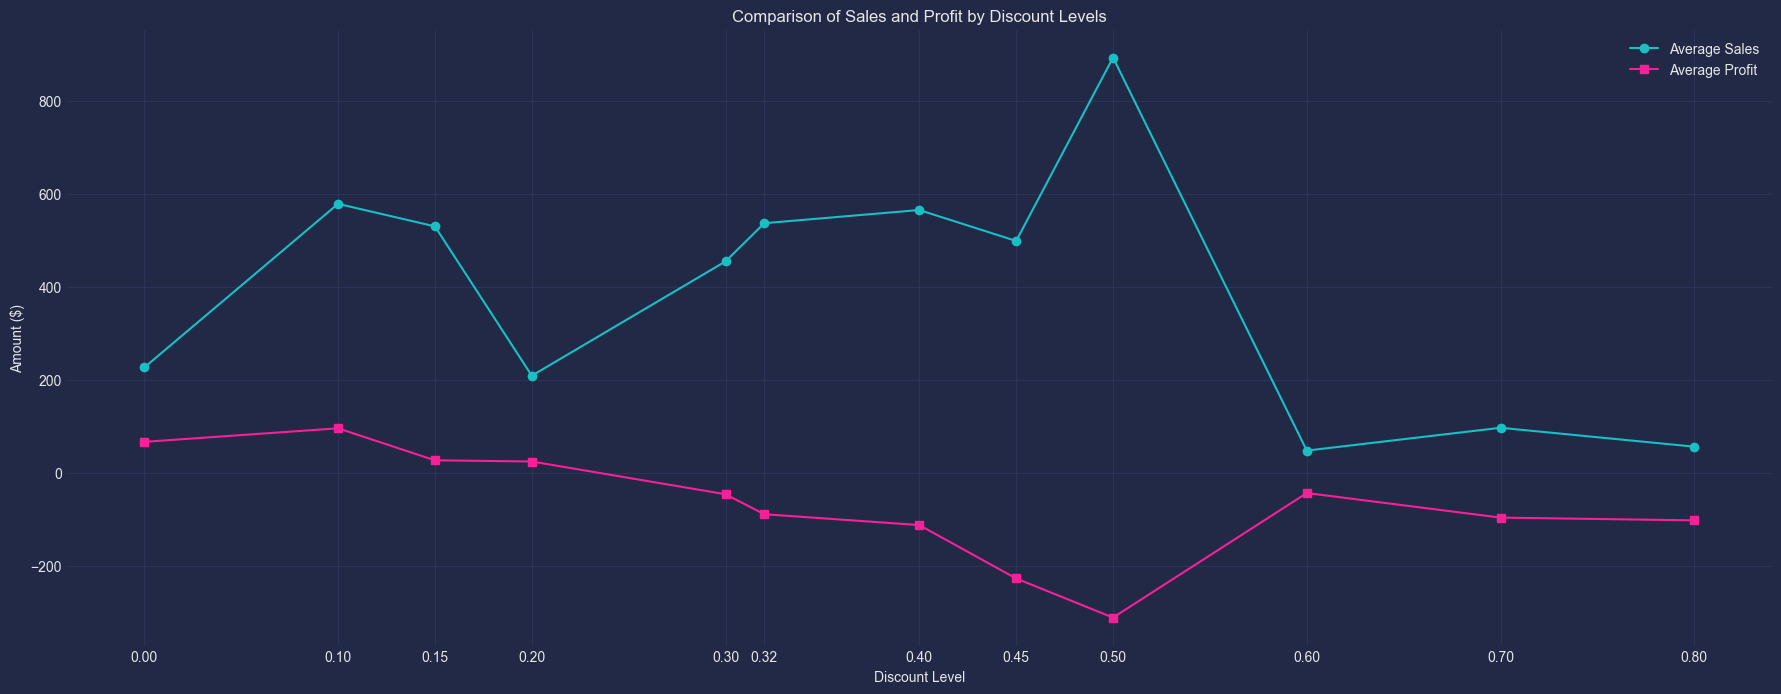

In [124]:

# Plot the average sales and profit for different discount levels
plt.figure()
plt.plot(avg_sales_profit_by_discount.index, avg_sales_profit_by_discount['Sales'], label='Average Sales', marker='o')
plt.plot(avg_sales_profit_by_discount.index, avg_sales_profit_by_discount['Profit'], label='Average Profit', marker='s')
plt.title('Comparison of Sales and Profit by Discount Levels')
plt.xlabel('Discount Level')
plt.ylabel('Amount ($)')
plt.xticks(avg_sales_profit_by_discount.index)
plt.legend()
plt.grid(True)
plt.show()


### Customer Segmentation 🎯👥

In this section, we'll delve into customer segmentation analysis to understand different customer groups based on their purchasing behavior, preferences, and demographics. 🛍️📊


#### 1. Can we identify distinct customer segments `Cluster` based on purchasing behavior?

In [130]:
data = df[['Customer ID', 'Sales', 'Quantity', 'Profit']]

customer_data = data.groupby('Customer ID').agg({
    'Sales': 'sum',
    'Quantity': 'sum',
    'Profit': 'sum'
}).reset_index()

# Check for any missing values and handle if necessary
customer_data.dropna(inplace=True)
customer_data

,Customer ID,Sales,Quantity,Profit
0,AA-10315,5563.560,30,-362.8825
1,AA-10375,1056.390,41,277.3824
2,AA-10480,1790.512,36,435.8274
3,AA-10645,5086.935,64,857.8033
4,AB-10015,886.156,13,129.3465
...,...,...,...,...
788,XP-21865,2374.658,100,621.2300
789,YC-21895,5454.350,31,1305.6290
790,YS-21880,6720.444,58,1778.2923
791,ZC-21910,8025.707,105,-1032.1490


Feature Selection and Scaling

In [136]:
from sklearn.preprocessing import StandardScaler

#* Select features for clustering (Sales, Quantity, Profit)
features = ['Sales', 'Quantity', 'Profit']
X = customer_data[features]

#* Standardize the features to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Customer Segmentation (Clustering)

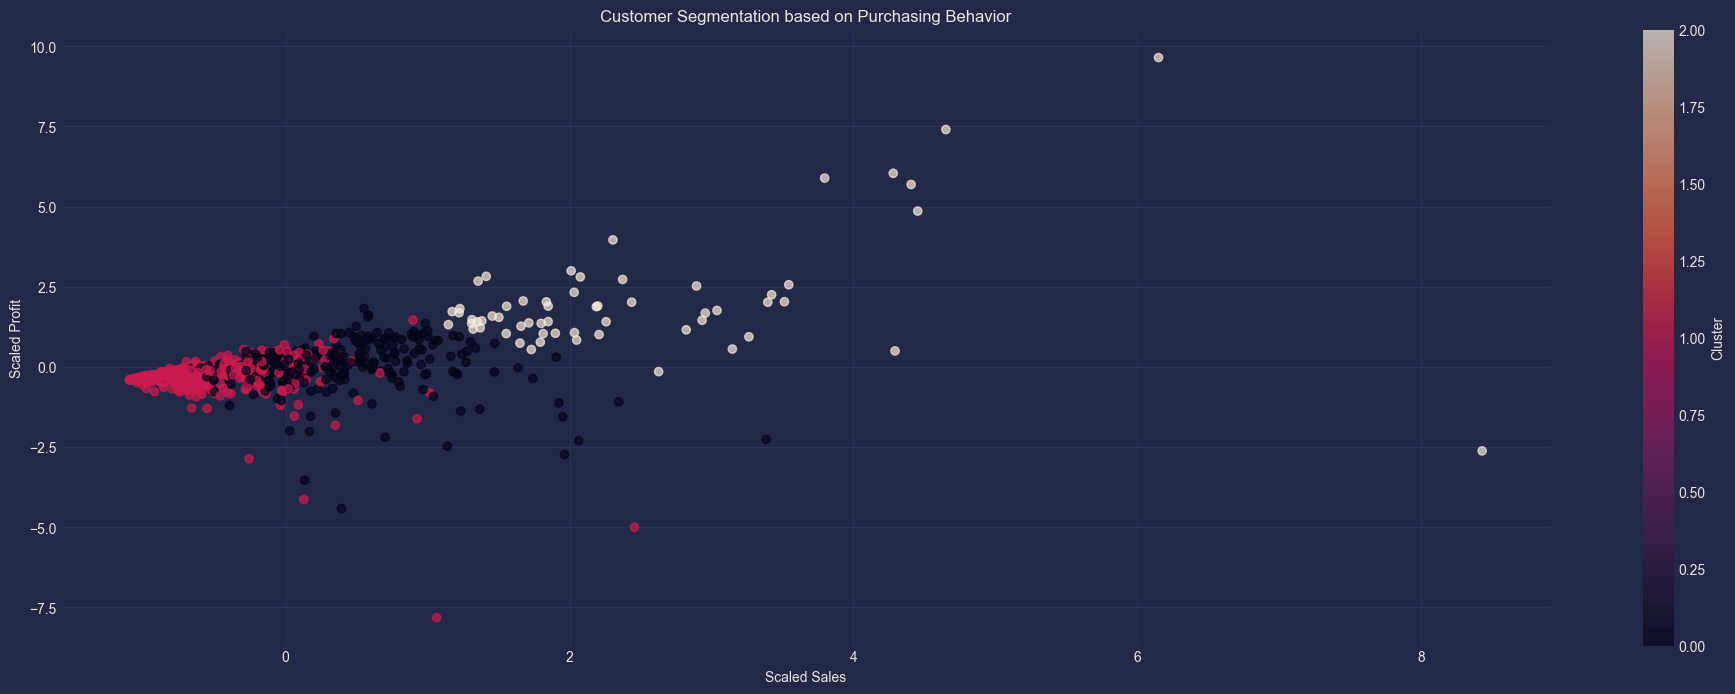

In [154]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
customer_data['Cluster'] = cluster_labels
plt.figure(figsize=(24, 8))
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=cluster_labels, cmap='rocket', alpha=0.7)
plt.xlabel('Scaled Sales')
plt.ylabel('Scaled Profit')
plt.title('Customer Segmentation based on Purchasing Behavior')
plt.colorbar(label='Cluster')
plt.show()

In [155]:
# Display the distribution of customers across clusters
cluster_counts = customer_data['Cluster'].value_counts().sort_index()
print("Number of customers in each cluster:")
print(cluster_counts)

Number of customers in each cluster:
0    290
1    443
2     60
Name: Cluster, dtype: int64


In [156]:
# Calculate average profit per customer for each cluster
avg_profit_per_customer = customer_data.groupby('Cluster')['Profit'].mean()

# Print average profit per customer for each cluster
print("Average Profit per Customer for Each Cluster:")
print(avg_profit_per_customer)


Average Profit per Customer for Each Cluster:
Cluster
0     375.098646
1     104.300547
2    2190.221200
Name: Profit, dtype: float64


Clusters with higher average profit per customer (Cluster 2) represent valuable customer segments that may require specific attention and strategic initiatives to maximize their potential contribution to overall profitability.

In [161]:
customer_distribution = customer_data.groupby(['Cluster', 'Segment', 'State']).size().reset_index(name='Count')

# Display the customer distribution by Cluster, Segment, and State
print("Customer Distribution by Cluster, Segment, and State:")
customer_distribution

Customer Distribution by Cluster, Segment, and State:


,Cluster,Segment,State,Count
0,0,Consumer,North Carolina,2
1,0,Consumer,Ohio,2
2,0,Consumer,Pennsylvania,3
3,0,Consumer,Tennessee,3
4,0,Consumer,Texas,6
...,...,...,...,...
178,2,Home Office,Michigan,1
179,2,Home Office,Montana,1
180,2,Home Office,Nevada,1
181,2,Home Office,New York,5


In [164]:
customer_distribution.groupby(['Cluster','Segment']).size()

Cluster  Segment    
0        Consumer        5
         Corporate       8
         Home Office     6
1        Consumer       47
         Corporate      45
         Home Office    48
2        Consumer        8
         Corporate       9
         Home Office     7
dtype: int64

**This finding suggests that customers in the Corporate segment are the most profitable on average compared to customers in the Consumer and Home Office segments within each cluster.**

#### 2. How do different segments contribute to overall sales and profit?


In [169]:
data = df[['Segment', 'Sales', 'Profit']]

segment_summary = data.groupby('Segment').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

print("Total Sales and Profit by Segment:")
segment_summary

Total Sales and Profit by Segment:


,Segment,Sales,Profit
0,Consumer,1.161401e+06,134119.2092
1,Corporate,7.061464e+05,91979.1340
2,Home Office,4.296531e+05,60298.6785


In [171]:
# Calculate the percentage contribution of each segment to total sales and profit
segment_summary['Sales Contribution (%)'] = (segment_summary['Sales'] / segment_summary['Sales'].sum()) * 100
segment_summary['Profit Contribution (%)'] = (segment_summary['Profit'] / segment_summary['Profit'].sum()) * 100

print("Contribution of Each Segment to Overall Sales and Profit:")
segment_summary[['Segment', 'Sales Contribution (%)', 'Profit Contribution (%)']]


Contribution of Each Segment to Overall Sales and Profit:


,Segment,Sales Contribution (%),Profit Contribution (%)
0,Consumer,50.557240,46.829820
1,Corporate,30.739426,32.115953
2,Home Office,18.703334,21.054227


### Customer Behavior 🛒📊

In this section, we'll analyze customer behavior to uncover patterns, preferences, and trends in shopping habits. 🛍️📊


#### 1. What is the repeat purchase rate among customers?


##### 1.1 What is The Most Segment Repeated


##### 1.2 which is the Most State


#### 2. Are there any seasonal or periodic patterns in customer purchasing behavior?


#### 3. How does customer loyalty (measured by frequency of purchases) correlate with sales and profit?


### Product Performance


#### 1. Which products are the best-sellers in each category and sub-category?


#### 2. Are there any products with consistently high or low profit margins?


#### 3. How does the quantity sold of a product correlate with its profit?


### Geographical Analysis 🗺️


#### 1. Which regions or states contribute the most to overall sales and profit?


#### 2. Are there any regions where certain product categories perform exceptionally well?


#### 3. How does shipping mode affect sales and profit across different regions?


### Order Analysis 📦


#### 1. What is the average number of products per order?


#### 2. What is the average price of an order?


#### 3. Is there a correlation between the order size (number of products) and the total sales or profit?


#### 4. Are there any patterns in the timing of orders, such as peak order times by day or month?


### Product Pricing Strategy


#### 1. How do the prices of products in different categories/sub-categories compare?


#### 2. Is there a relationship between product price and sales quantity or profit?


#### 3. Are there any pricing strategies (e.g., premium pricing vs. discount pricing) that lead to higher sales and profit?
